##About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

##Dataset columns:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelBinarizer,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,BaseDecisionTree
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA,MiniBatchSparsePCA
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Algerian_forest_fires_dataset.csv to Algerian_forest_fires_dataset.csv


In [ ]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.shape

(247, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
#Data Cleaning
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [ ]:
##As the attached dataset is divided into two parts till 122 it is 0ne region dataset and after 122 it is another region dataset we
##will simply create an another column named region and will encode it with 0 and 1
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [ ]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
103,12,9,2012,29,88,13,0,71,2.6,16.6,1.2,3.7,0.5,not fire,0.0
49,20,7,2012,33,65,15,0.1,81.4,12.3,62.1,2.8,16.5,4,fire,0.0
84,24,8,2012,34,64,14,0,88.9,40.5,171.3,9,50.9,20.9,fire,0.0
106,15,9,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,not fire,0.0
67,7,8,2012,32,69,16,0,86.5,15.5,48.6,5.5,17.2,8,fire,0.0
21,22,6,2012,31,67,17,0.1,79.1,7,39.5,2.4,9.7,2.3,not fire,0.0
224,8,9,2012,30,88,14,0,82.5,6.6,26.1,3,8.1,2.7,fire,1.0
147,23,6,2012,33,59,16,0.8,74.2,7,8.3,1.6,6.7,0.8,not fire,1.0
22,23,6,2012,32,62,18,0.1,81.4,8.2,47.7,3.3,11.5,3.8,fire,0.0
72,12,8,2012,35,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,not fire,0.0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


In [ ]:
df['Region']=df['Region'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 38.6+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
df=df.reset_index()

In [ ]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [ ]:
df.drop(122, inplace=True)

In [ ]:
df.drop('index',inplace=True,axis=1)

In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
##As we can see that there are some extra name spaces in the column names so lets remove the extra name spaces
df.columns=df.columns.str.strip()
#The .strip() method is not a specific method in pandas, but rather a string method that
#can be applied to pandas Series containing string data. It is used to remove leading
#and trailing whitespace (spaces, tabs, or other whitespace characters)
#from each element in the Series. This can be useful for cleaning up text data in a DataFrame.

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['day'].value_counts()

1     8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
22    8
21    8
20    8
19    8
18    8
16    8
2     8
15    8
13    8
12    8
11    8
10    8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
14    7
31    4
Name: day, dtype: int64

In [ ]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df['Date']=pd.to_datetime(df[['day','month','year']],format='%d-%m-%Y')

In [ ]:
df=df.drop(['day','month','year'],axis=1)

In [ ]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI',]]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI',]].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    object        
 11  Region       243 non-null    int64         
 12  Date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 26.6+ KB


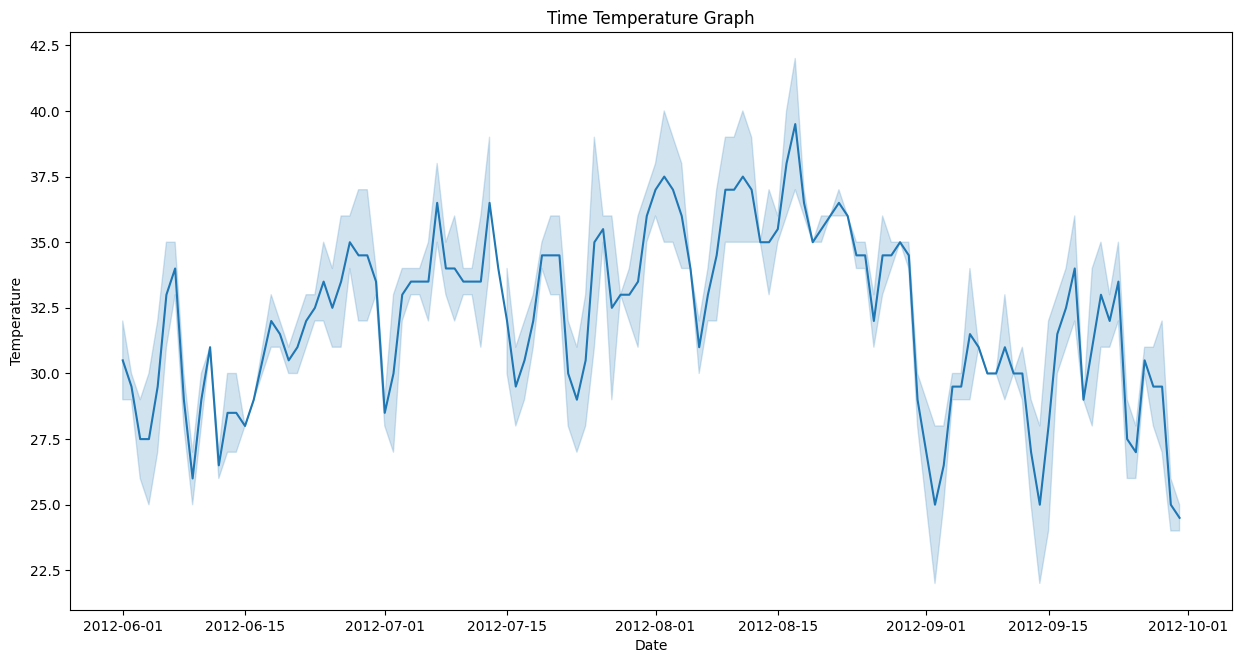

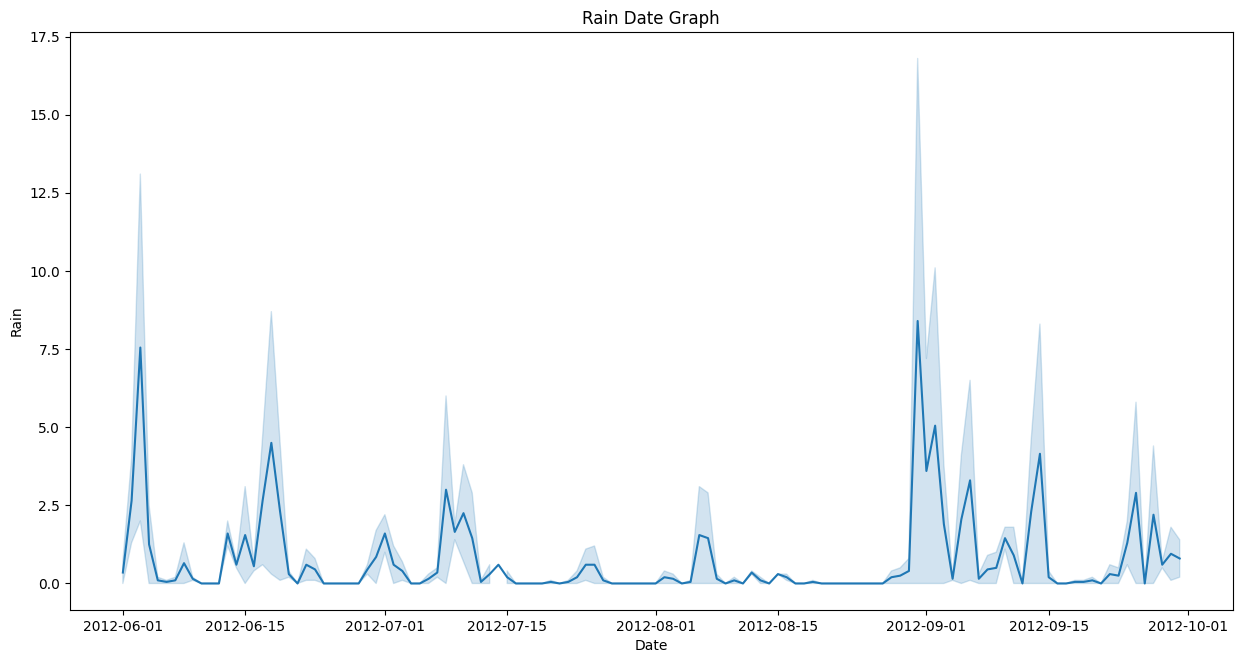

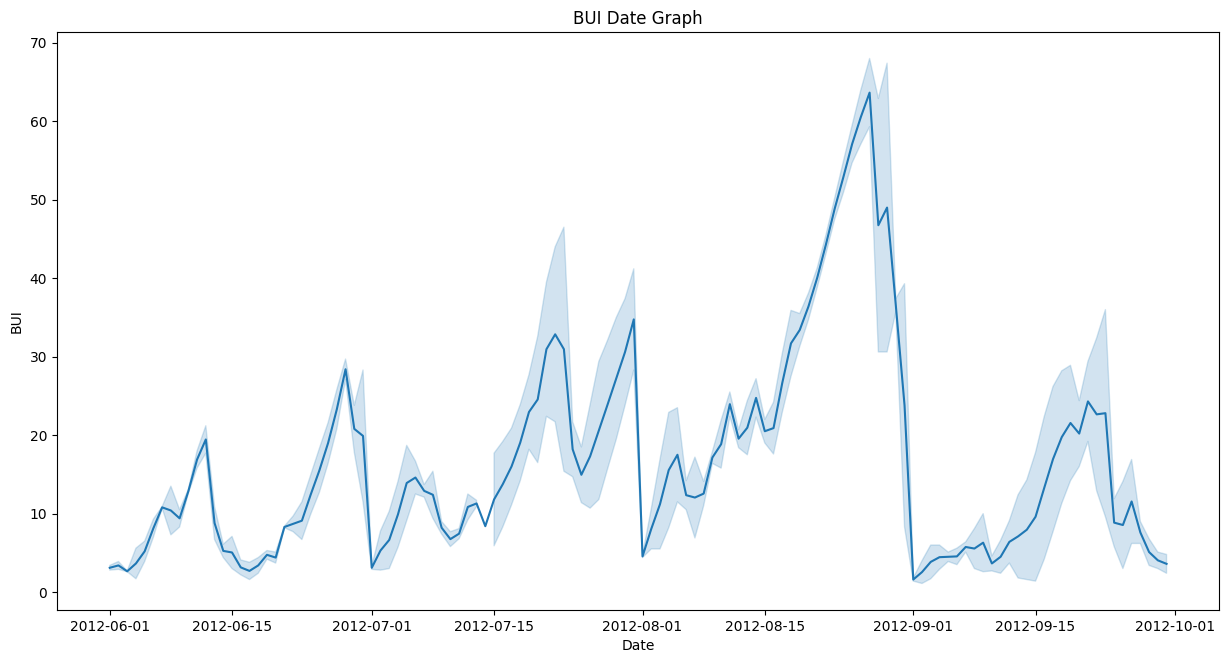

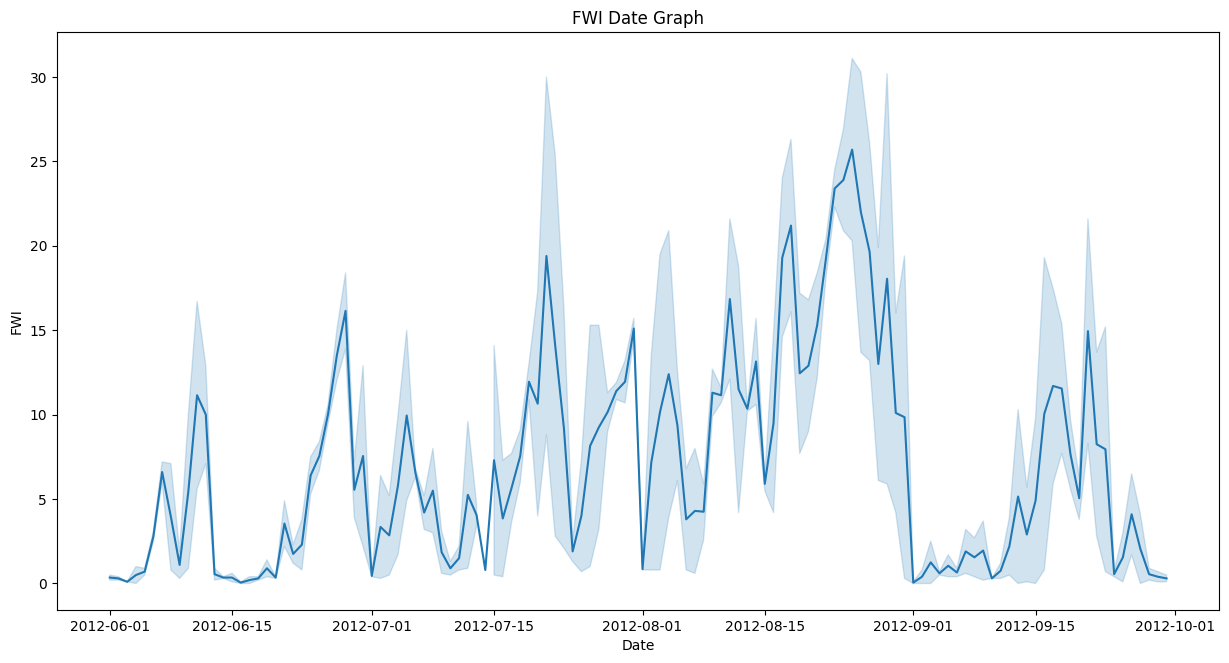

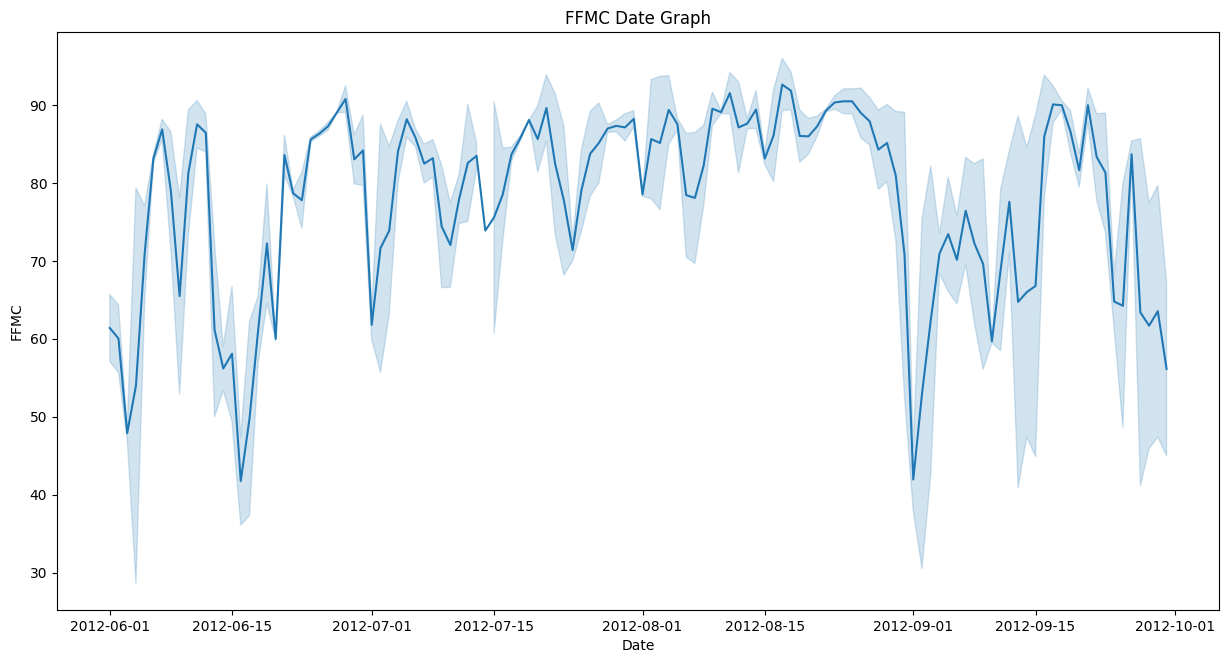

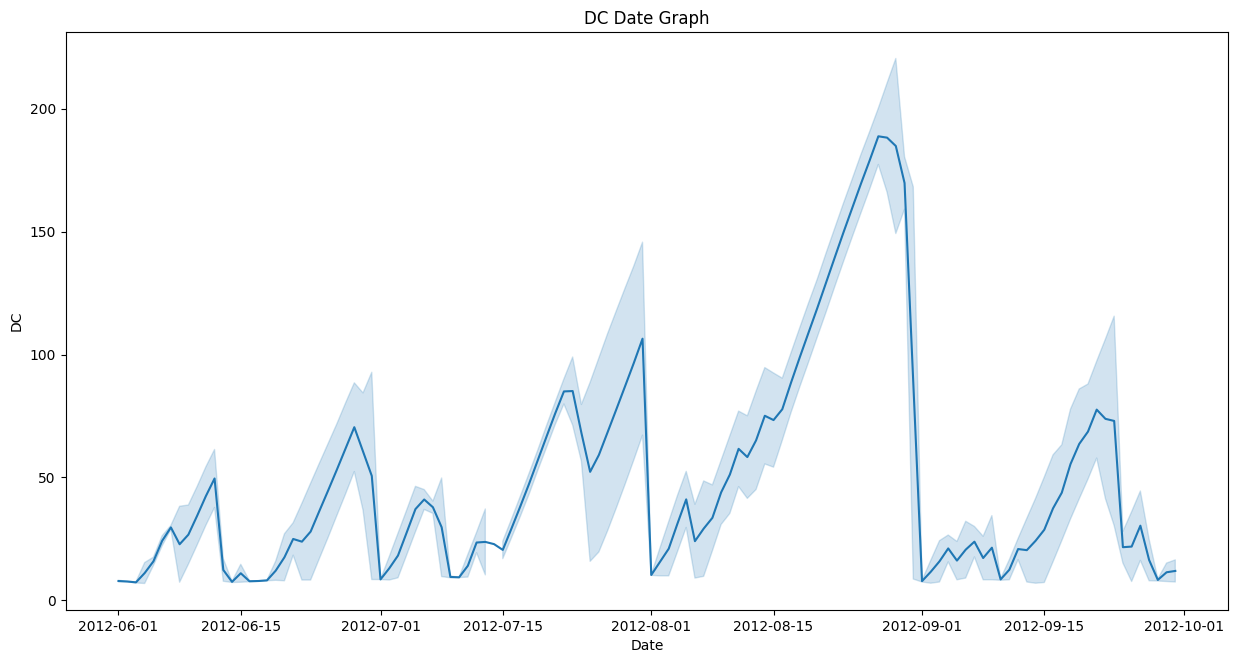

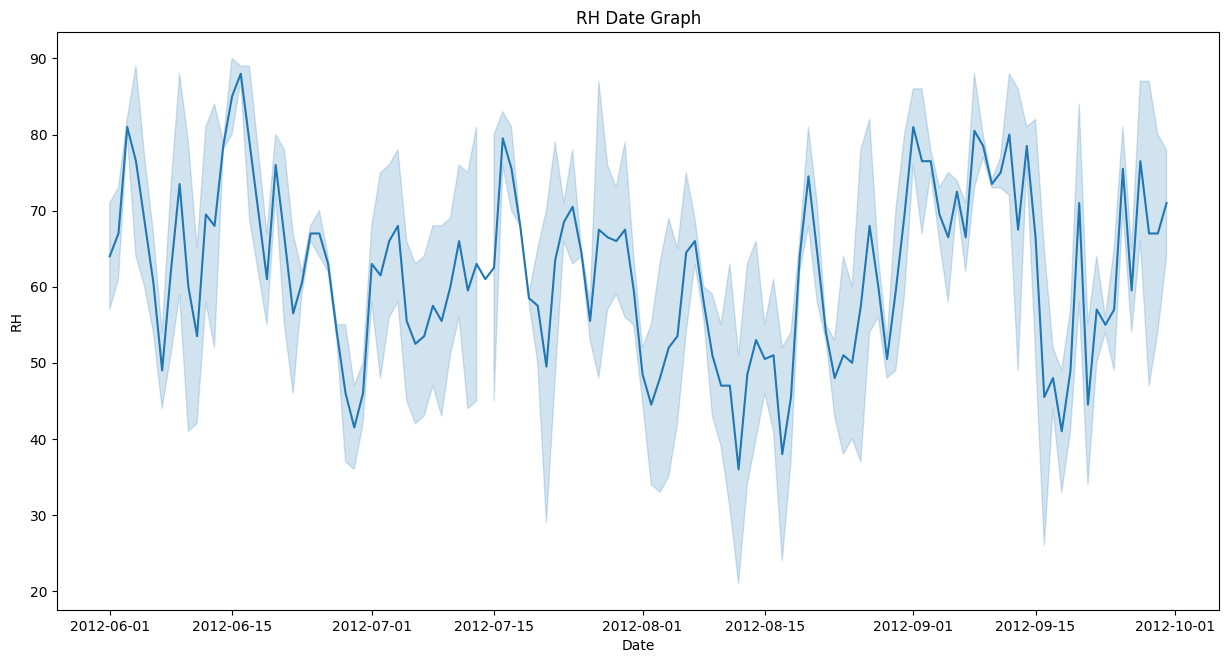

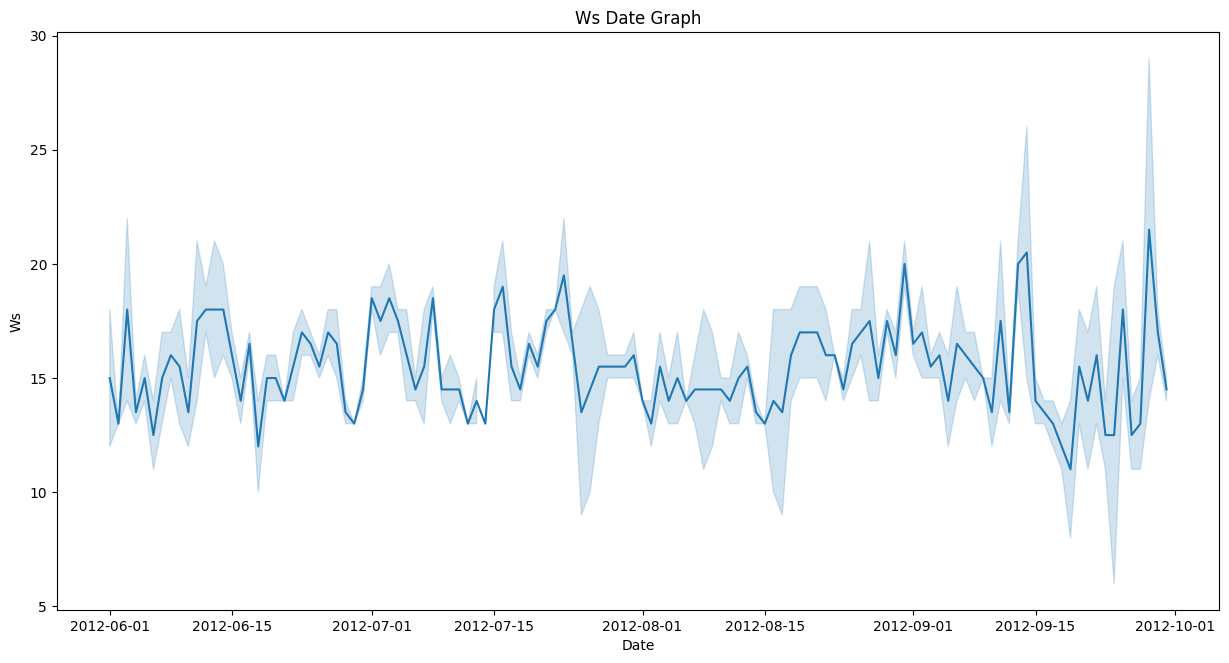

In [ ]:
plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='Temperature',data=df)
plt.title('Time Temperature Graph')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='Rain',data=df)
plt.title('Rain Date Graph')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='BUI',data=df)
plt.title('BUI Date Graph')
plt.xlabel('Date')
plt.ylabel('BUI')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='FWI',data=df)
plt.title('FWI Date Graph')
plt.xlabel('Date')
plt.ylabel('FWI')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='FFMC',data=df)
plt.title('FFMC Date Graph')
plt.xlabel('Date')
plt.ylabel('FFMC')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='DC',data=df)
plt.title('DC Date Graph')
plt.xlabel('Date')
plt.ylabel('DC')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='RH',data=df)
plt.title('RH Date Graph')
plt.xlabel('Date')
plt.ylabel('RH')
plt.show()

plt.figure(figsize=(15,7.5))
sns.lineplot(x='Date',y='Ws',data=df)
plt.title('Ws Date Graph')
plt.xlabel('Date')
plt.ylabel('Ws')
plt.show()

In [ ]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [ ]:
#encoding the classes column
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df.sample(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
17,31,78,14,0.3,56.9,1.9,8.0,0.7,2.4,0.2,0,0,2012-06-18
90,35,70,17,0.8,72.7,25.2,180.4,1.7,37.4,4.2,0,0,2012-08-30
130,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,0,1,2012-06-08
219,34,71,14,6.5,64.5,3.3,9.1,1.0,3.5,0.4,0,1,2012-09-06
226,29,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1,1,2012-09-13
62,35,55,12,0.4,78.0,5.8,10.0,1.7,5.5,0.8,0,0,2012-08-02
133,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1,2012-06-11
12,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,0,0,2012-06-13
113,31,50,19,0.6,77.8,10.6,41.4,2.4,12.9,2.8,0,0,2012-09-22
44,30,80,19,0.4,60.7,5.2,17.0,1.1,5.9,0.5,0,0,2012-07-15


<Axes: >

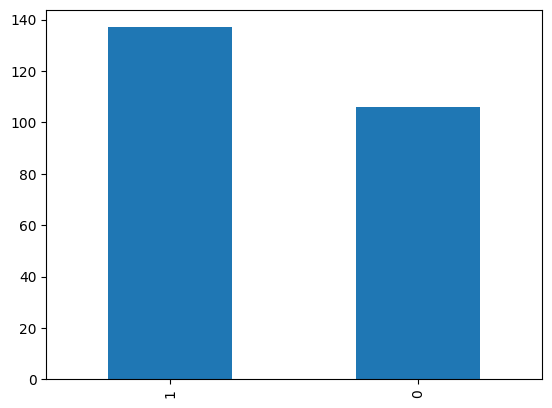

In [ ]:
df.Classes.value_counts().plot(kind='bar')

<ipython-input-42-41d8505f6c78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


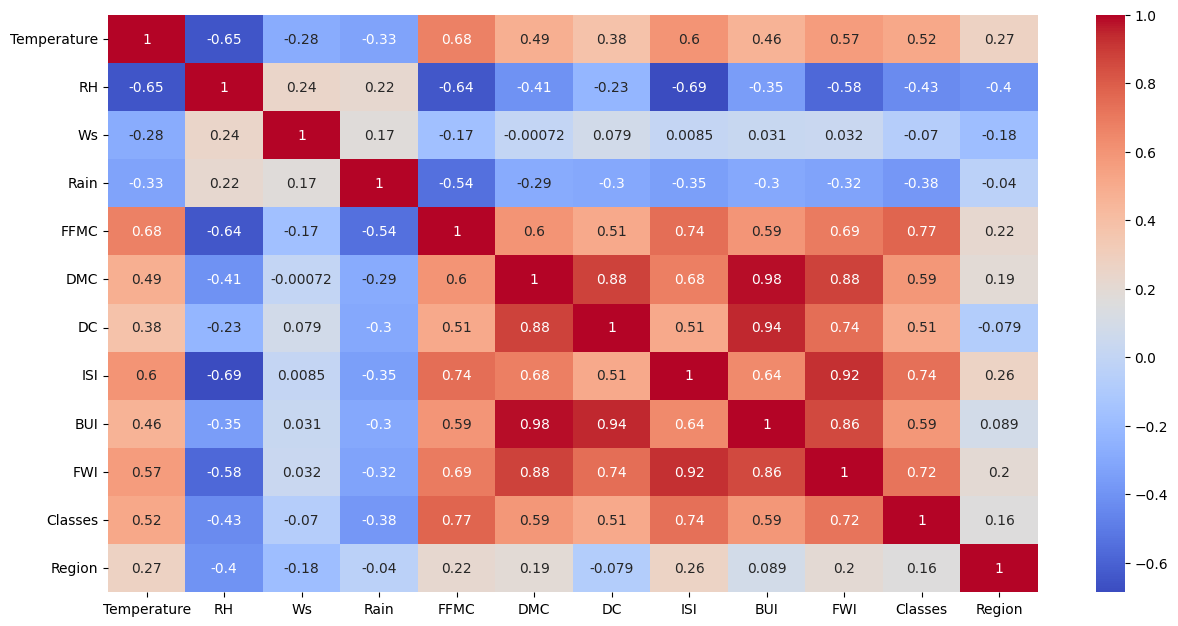

In [ ]:
correlation=df.corr()
plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

## By checking the correlation matrix we can only identify the pair of highly correlated features and we eliminates one feature out of them but we dont know which feature is more important among them.

In [ ]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

In [ ]:
df=df.drop('Date',axis=1)

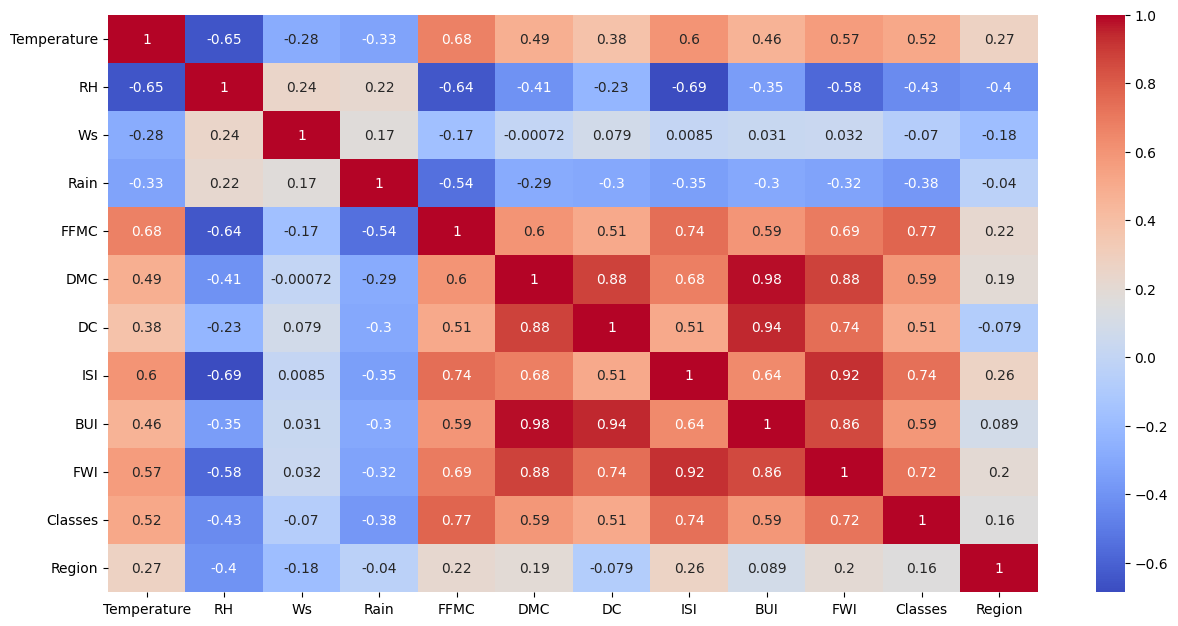

In [ ]:
correlation_2=df.corr()
plt.figure(figsize=(15,7.5))
sns.heatmap(correlation_2,annot=True,cmap='coolwarm')
plt.show()

##Imagine you're trying to bake a cake, and you have two ingredients that are very similar, like butter and margarine. You want to know how each of them affects the taste of the cake. So, you ask your friend to taste the cake with only butter, then taste another cake with only margarine, and tell you which one tastes better.

Now, let's say both cakes end up tasting very similar, and your friend can't really tell the difference between them. This is where the problem of multicollinearity comes in.

In the context of multicollinearity:

Butter represents one ingredient, like sugar in a cake recipe.
Margarine represents another ingredient, like honey in the same cake recipe.
Multicollinearity occurs when these two ingredients (sugar and honey) are so similar that when you change the amount of one, it's tough to figure out which ingredient is actually responsible for the change in the taste of the cake. In other words, you can't easily separate the effects of these two ingredients on the cake's taste because they're too similar.

Similarly, in statistics and data analysis, multicollinearity happens when you have two or more variables in a dataset that are strongly related to each other. When this occurs, it becomes challenging to understand the individual impact of each variable on the outcome you're studying (like cake taste) because they're tangled up and intertwined. It can make it harder to pinpoint which variable is causing what effect.

Just like it's difficult to tell if it's the sugar or honey that's affecting the cake's taste, in data analysis, multicollinearity makes it hard to say whether it's one variable or the other that's influencing the result you're interested in. So, it's important to deal with multicollinearity to get a clear picture of the factors at play in your data.

##Multicollinearity
 is a statistical phenomenon that occurs when two or more independent variables (features) in a regression model are highly correlated with each other. In other words, it's a situation where one independent variable in a regression model can be linearly predicted from the others with a substantial degree of accuracy. Multicollinearity can cause several issues in regression analysis, and it's important to understand its implications.

To address multicollinearity, you can take several steps:

Correlation Analysis: Calculate correlation coefficients between independent variables to identify highly correlated pairs.

Feature Selection: Choose a subset of features that are most relevant to the problem, removing redundant ones.

Feature Engineering: Combine or transform correlated features into a single feature.

Regularization: Use techniques like Ridge or Lasso regression, which penalize the influence of less important features and can help mitigate multicollinearity.

Collect More Data: Sometimes, multicollinearity can be alleviated by collecting more data.

Principal Component Analysis (PCA): PCA can be used to transform the original features into a set of orthogonal (uncorrelated) features, reducing multicollinearity.

Handling multicollinearity is essential for building robust and interpretable regression models. The choice of method depends on the specific problem and dataset.

##Question 1:
Q: What is a correlation matrix, and what is its purpose in data analysis?

A correlation matrix is a square matrix that displays the pairwise correlations between variables in a dataset. It shows how strongly and in what direction two variables are related. The main purpose of a correlation matrix is to identify relationships between variables, assess multicollinearity, and aid in feature selection or dimensionality reduction.

##Question 2:
Q: How is the correlation coefficient calculated, and what are its possible values?

A:
The correlation coefficient, often denoted as "r" or "ρ," measures the strength and direction of the linear relationship between two variables. It is calculated using the Pearson correlation formula:

�
=
∑
(
�
−
�
ˉ
)
(
�
−
�
ˉ
)
∑
(
�
−
�
ˉ
)
2
⋅
∑
(
�
−
�
ˉ
)
2
r=
∑(X−
X
ˉ
 )
2
 ⋅∑(Y−
Y
ˉ
 )
2

​

∑(X−
X
ˉ
 )(Y−
Y
ˉ
 )
​


The correlation coefficient can range from -1 to 1:

A positive value (closer to 1) indicates a positive linear relationship.
A negative value (closer to -1) indicates a negative linear relationship.
A value close to 0 suggests little to no linear relationship.

##Question 3:
Q: How do you interpret the values in a correlation matrix?

A:
Interpretation of the values in a correlation matrix:

Values close to 1 or -1 indicate a strong linear relationship in the corresponding direction (positive or negative).
A value close to 0 suggests little to no linear relationship.
Values between -1 and 1 indicate the strength of the relationship.

##Q: What is the significance of diagonal elements in a correlation matrix?

A:
The diagonal elements of a correlation matrix always have a value of 1 because they represent the correlation of a variable with itself. This is known as perfect correlation, as a variable is perfectly correlated with itself. Diagonal elements are often shown as 1s in a correlation matrix.

##Q: Can a correlation matrix be used to identify causation between variables?

A:
No, a correlation matrix cannot establish causation. It can only show the strength and direction of linear relationships between variables. Causation implies that changes in one variable cause changes in another, which requires additional experimental or causal inference methods to establish.

##Q: How can you visually represent a correlation matrix?

A:
A common way to visualize a correlation matrix is by using a heatmap, where each cell's color represents the strength and direction of the correlation. Positive correlations are often shown in one color scale (e.g., shades of blue), and negative correlations in another (e.g., shades of red), with intensity indicating the strength of the correlation.

##Q: What is the difference between a positive and a negative correlation coefficient in a correlation matrix?

A:

A positive correlation coefficient (closer to 1) indicates that as one variable increases, the other tends to increase as well.
A negative correlation coefficient (closer to -1) indicates that as one variable increases, the other tends to decrease.

##Q: When is the Spearman rank correlation coefficient used, and how does it differ from the Pearson correlation coefficient?

A:
The Spearman rank correlation coefficient is used when the relationship between variables is not linear or when data is ordinal. It measures the strength and direction of the monotonic relationship between variables. Unlike the Pearson correlation, the Spearman correlation is based on the ranks of data points rather than their actual values.

##Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.

Multicollinearity can lead to unstable and unreliable coefficient estimates, making it harder to interpret the results and draw meaningful conclusions from the model. It is essential to detect and address multicollinearity to ensure the validity and robustness of regression models.

Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model.

##This means that one independent variable can be predicted from another in a regression model. For example, sets like height and weight, household income and water consumption, mileage and the price of a car, study time and leisure time, etc.

Let me take a simple example from our everyday life to explain this. Colin loves watching television while munching on chips. The more television he watches, the more chips he eats, and the happier he gets!

Now, if we could quantify happiness and measure Colin’s happiness while he’s busy doing his favorite activity, which do you think would have a greater impact on his happiness? Having chips or watching television? That’s difficult to determine because the moment we try to measure Colin’s happiness from eating chips, he starts watching television. And the moment we try to measure his happiness from watching television, he starts eating chips.


Introduction
Multicollinearity might be a handful to pronounce, but it’s a topic you should be aware of in the field of data science and machine learning, especially if you’re sitting for data scientist interviews! In this article, we will understand what multicollinearity is and how it is caused. We will also try to understand why it is a problem and how we can detect and fix it.

Multicollinearity
Before diving further, it is imperative to have a basic understanding of regression and some statistical terms. For this, I highly recommend going through the below resources:

Fundamentals of Regression Analysis (Free Course!)
Beginner’s Guide to Linear Regression
Learning Objective
Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.

Multicollinearity can lead to unstable and unreliable coefficient estimates, making it harder to interpret the results and draw meaningful conclusions from the model. It is essential to detect and address multicollinearity to ensure the validity and robustness of regression models.
This means that one independent variable can be predicted from another in a regression model. For example, sets like height and weight, household income and water consumption, mileage and the price of a car, study time and leisure time, etc.
So why should you worry about multicollinearity in the machine learning context? Let’s answer that question next.
Multicollinearity may not affect the accuracy of the machine-learning model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

##What Causes Multicollinearity?
Multicollinearity could occur due to the following problems:

Multicollinearity could exist because of the problems in the dataset at the time of creation. These problems could be because of poorly designed experiments, highly observational data, or the inability to manipulate the data.
For example, determining the electricity consumption of a household from the household income and the number of electrical appliances. Here, we know that the number of electrical appliances in a household will increase with household income. However, this cannot be removed from the dataset.
Multicollinearity could also occur when new variables are created which are dependent on other variables.
#Dealing with multicollinearity without dropping a column (variable) can be important if you believe that all the variables are theoretically relevant and you want to retain them in your analysis. Here are some strategies to mitigate multicollinearity while keeping all the variables:

Principal Component Analysis (PCA):
PCA is a dimensionality reduction technique that can help transform your correlated variables into a new set of uncorrelated variables, known as principal components. You can then use these principal components in your analysis. Keep in mind that the new components might not have a straightforward interpretation in terms of the original variables.

Ridge Regression:
Ridge regression is a type of linear regression that adds a penalty term to the model, encouraging the model to keep all the variables but with smaller coefficients. This can help in reducing the impact of multicollinearity. Ridge regression is often used when you want to keep all variables but regularize them.

Partial Least Squares (PLS) Regression:
PLS is a technique that is similar to PCA but specifically designed for regression problems. It aims to find a set of new variables (latent variables) that explain the maximum variance in both the predictors and the response variable. PLS can reduce multicollinearity by creating latent variables that are linear combinations of the original variables.

Variable Transformation:
You can try transforming your variables to reduce multicollinearity. For example, you can create interaction terms or polynomial features, which might help in capturing the relationships between the variables in a different way. These new features may not exhibit multicollinearity.

Subset Selection Methods:
Instead of dropping a whole variable, you can use subset selection methods like forward selection or backward elimination. These methods iteratively add or remove variables from the model to find the best subset of variables that explain the outcome.

Data Collection and Feature Engineering:
Sometimes multicollinearity arises from the way data is collected or the features engineered. In such cases, it might be beneficial to revisit the data collection process and consider creating new features that are less correlated.

Regularization Techniques:
Techniques like Lasso regression can drive some coefficients to zero, effectively excluding certain variables from the model. If you use Lasso with a strong penalty, it will essentially perform feature selection for you.

Domain Knowledge:
Consider whether you truly need all the variables in your model. Sometimes, domain knowledge and subject-matter expertise can help you identify which variables are truly essential for your analysis.

##Question 1:
Q: What is multicollinearity in the context of regression analysis?

A:
Multicollinearity is a phenomenon in regression analysis where two or more independent variables in a multiple regression model are highly correlated with each other. This high correlation can lead to problems in estimating the individual effects of these variables on the dependent variable.

##Question 2:
Q: Why is multicollinearity a problem in regression analysis?

A:
Multicollinearity is a problem because it can make it difficult to determine the true relationship between independent variables and the dependent variable. It can lead to unstable coefficient estimates, making it challenging to interpret the impact of each independent variable independently. Additionally, it can affect the precision of coefficient estimates and can result in misleading or unstable model results.

##Question 3:
Q: How can you detect multicollinearity in a regression analysis?

A:
There are several methods to detect multicollinearity, including:

Correlation Matrix: Calculate the correlation matrix between independent variables, and look for high correlation coefficients.
Variance Inflation Factor (VIF): Calculate the VIF for each variable, and if the VIF is significantly greater than 1, it indicates multicollinearity.
Eigenvalues: Calculate the eigenvalues of the correlation matrix, and if there are small eigenvalues, it suggests multicollinearity.

##Question 4:
Q: What are some common consequences of multicollinearity in regression analysis?
A:
Common consequences of multicollinearity include:
Coefficient estimates become unstable and can have large standard errors.
It becomes challenging to interpret the individual effects of correlated variables.
The overall model fit statistics may appear strong even if the model has little predictive power.
The direction of the coefficient estimates can become counterintuitive.

##Question 5:
Q: How can you address or mitigate multicollinearity in a regression model?
There are several techniques to address multicollinearity:
Remove one of the correlated variables: If two or more variables are highly correlated, you can choose to retain the most relevant one and remove the others.
Combine correlated variables: Create new variables as linear combinations of the correlated variables.
Principal Component Analysis (PCA): Use PCA to transform the correlated variables into a set of uncorrelated principal components.
Ridge Regression or Lasso Regression: These regularization techniques can help mitigate multicollinearity by penalizing large coefficients.

##Question 6:
Q: Can you explain the difference between perfect multicollinearity and imperfect multicollinearity?
Perfect Multicollinearity: This occurs when there is an exact linear relationship between two or more independent variables in the model. For example, if you have two variables where one is a constant multiple of the other (e.g., X2 = 2 * X1), it results in perfect multicollinearity.
Imperfect Multicollinearity: In this case, there is a high degree of correlation between independent variables, but it is not an exact linear relationship. Imperfect multicollinearity is more common in practice and can still lead to issues in regression analysis.

##Question 7:
Q: What are the potential drawbacks of removing variables to address multicollinearity?

A:
Removing variables to address multicollinearity can result in a loss of information and may lead to an oversimplified model. It's important to carefully consider the domain knowledge and the research question before deciding which variables to remove. Additionally, removing variables may not always be the best solution, and other techniques like regularization or dimensionality reduction may be more appropriate.

In [ ]:
#droping the highly correlated features after knowing which feature is highly relevency
##Method1-variance threas hold
variance_of_features=df.var()
print(variance_of_features)

Temperature      13.162670
RH              219.874333
Ws                7.903887
Rain              4.012837
FFMC            205.912204
DMC             153.587434
DC             2272.009994
ISI              17.257659
BUI             202.447968
FWI              55.362048
Classes           0.246948
Region            0.251029
dtype: float64


#It is the general step in machine learning that feature selection should be happen after the scalling and outlier treatment
#Feature Scaling Before Feature Selection:

Normalization: Many machine learning algorithms are sensitive to the scale of features. If features have different scales, some algorithms might assign higher importance to features with larger scales, leading to suboptimal performance.

Stability: Scaling ensures that all features have a similar range of values, which can make feature selection more stable and consistent. Feature selection methods may behave differently if features have vastly different scales, and this could affect the features selected.

#Feature Selection After Feature Scaling:

Information Preservation: Feature scaling does not alter the relationships between features. Therefore, after scaling, the relative importance or relationships between features remain the same, and you can perform feature selection based on the actual information content of the features.

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Looking for outliers and distribution of the data

###Method-1 by visual method

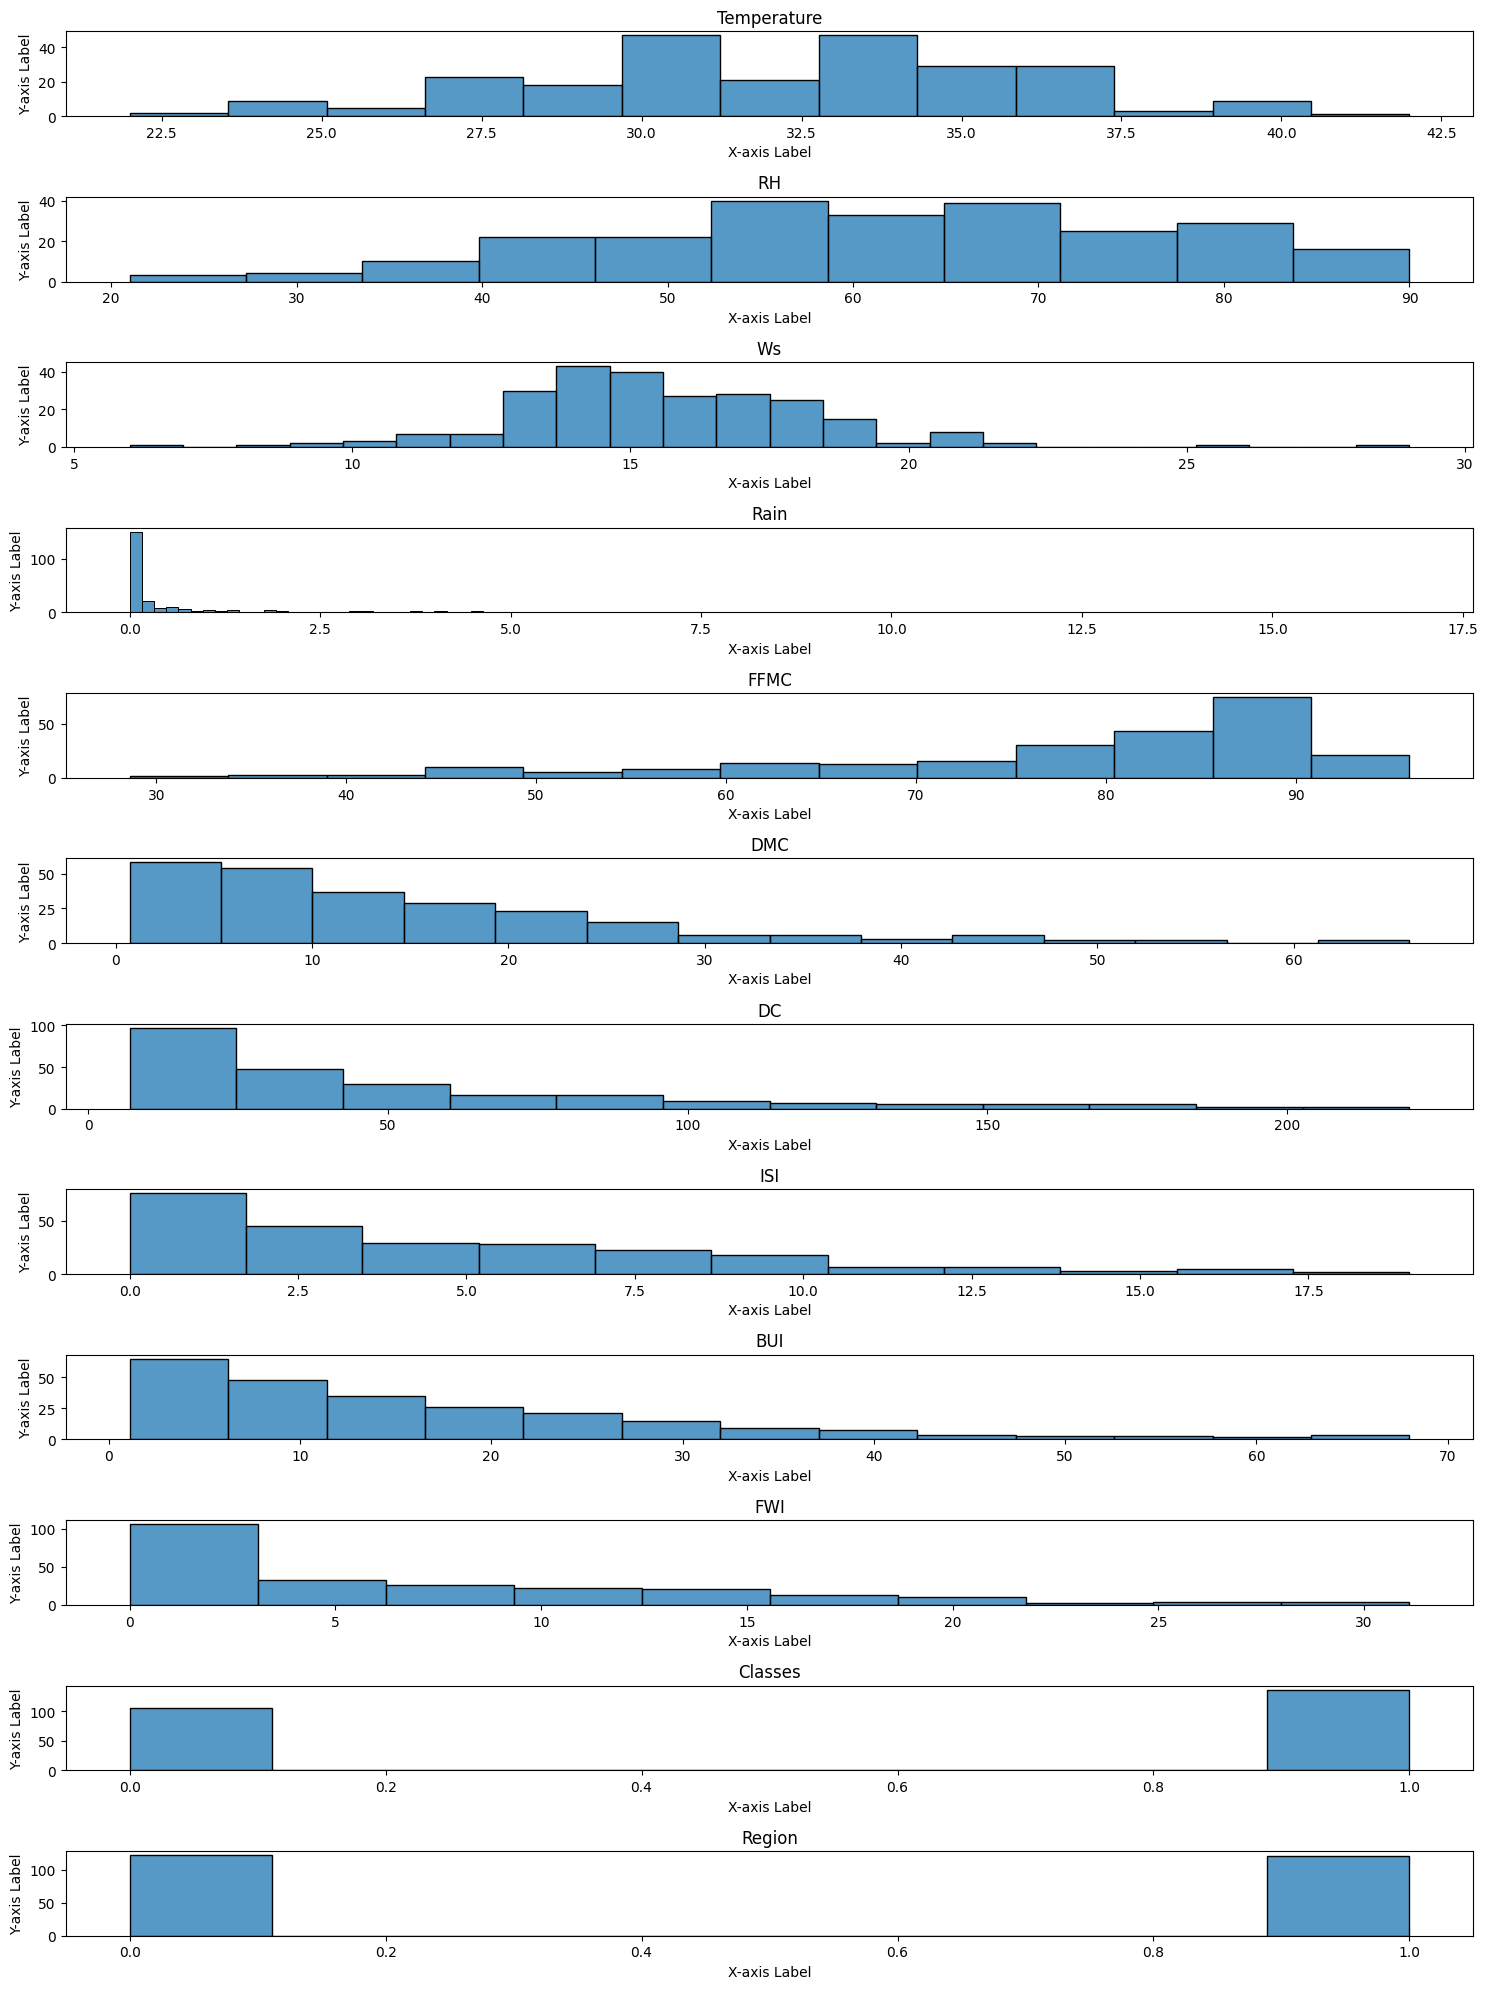

In [ ]:
#checking the distribution of the dataset visually
column_names = df.columns

# Set the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,20))

# Iterate over each column
for i, column in enumerate(column_names):
    # Select the appropriate subplot
    ax = axs[i] if num_rows > 1 else axs

    # Create a histplot for the column
    sns.histplot(data=df, x=column, ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

##Method-2 by basic statics method

In [ ]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


##Method-3 by plotting the box plot

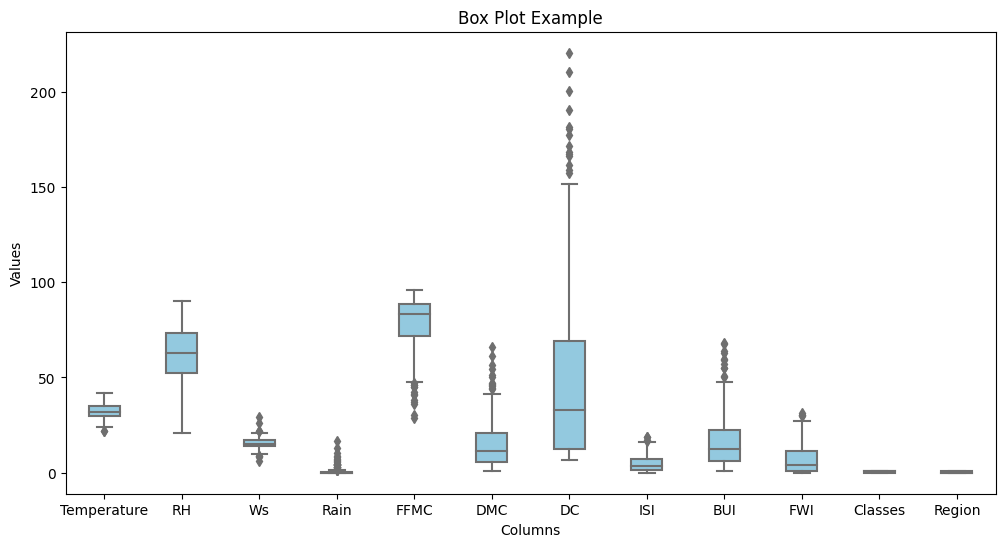

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(df, color='skyblue', width=0.4, orient='v')
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot Example")
plt.show()

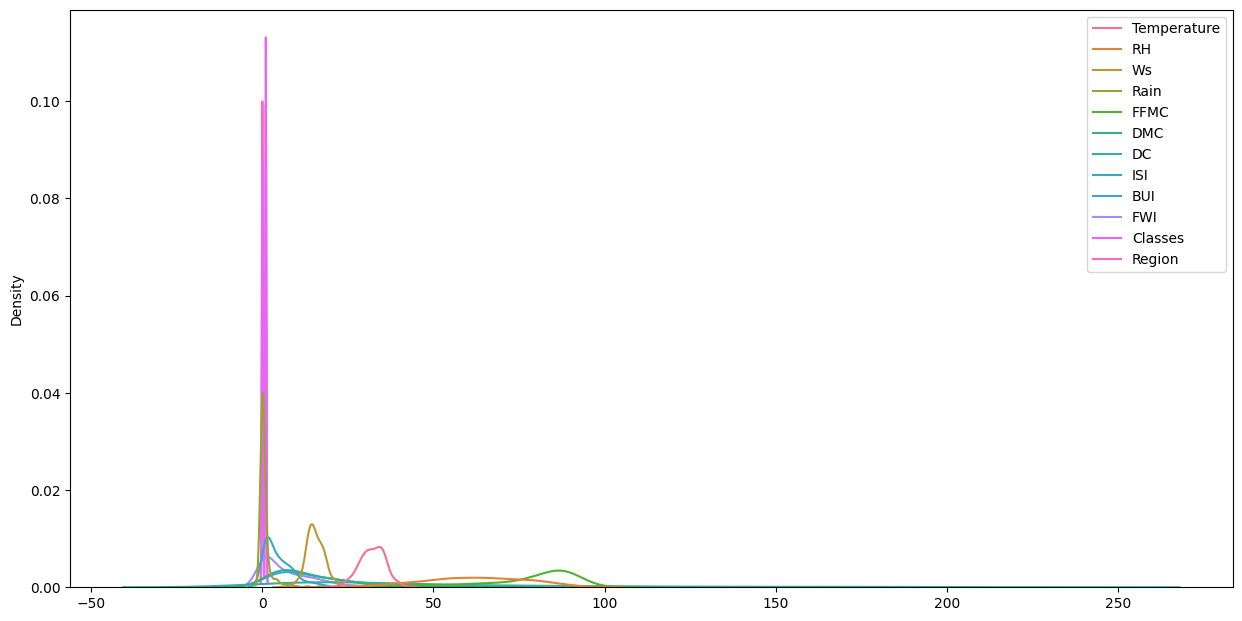

In [ ]:
plt.figure(figsize=(15,7.5))
sns.kdeplot(df)
plt.show()

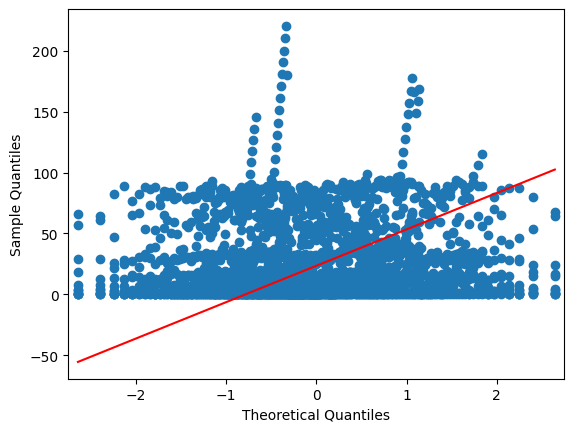

In [ ]:
import statsmodels.api as sm
sm.qqplot(df, line='s')
plt.show()

##Outliers

Think of data as a group of friends who all like playing video games. They often gather to play together, and each person records how many hours they spend playing games every day. Now, most of your friends play games for a reasonable amount of time, like 1 to 3 hours a day.

However, there's that one friend who is super dedicated to gaming. They play for 10 hours a day, every day! This friend's gaming time is way higher than what's typical for your group.

In the world of data, this friend who plays games for 10 hours a day is like an "outlier." An outlier is a data point that's significantly different or stands out from the rest of the data. It's like an extreme or unusual value that doesn't fit the pattern of the majority.

#Visualization:
Start by plotting your data. Visualizations like box plots, histograms, and scatter plots can help you see if there are any data points that look far away from the main cluster of data. This is a quick way to identify potential outliers.

#Statistical Methods:
There are several statistical methods to detect outliers. Two common methods are:

#Z-Score:
Calculate the Z-score for each data point. The Z-score tells you how many standard deviations a data point is away from the mean. Data points with a Z-score beyond a certain threshold (often 2 or 3 standard deviations) can be considered outliers.

#IQR (Interquartile Range) Method:
Calculate the IQR, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). Any data point below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR can be considered an outlier.

#Domain Knowledge:
Sometimes, what looks like an outlier may not be an error but rather a rare or unusual event in your data. In such cases, you might choose to keep these outliers in your analysis, but it's essential to have a good understanding of the domain and context of your data.

#Data Transformation:
Consider transforming your data if it's highly skewed or if the outliers are causing issues. Common transformations include taking the logarithm, square root, or using other mathematical functions to bring the data closer to a normal distribution.

#Truncate or Winsorize Data:
Instead of removing outliers, you can set a threshold beyond which any value exceeding that threshold is capped. For example, you might decide that any value above 99th percentile is replaced with the value at the 99th percentile.

#Model-Based Approaches:
Outliers can also be identified using machine learning models. Some algorithms are sensitive to outliers, and their presence can affect model performance. You can use these models to detect and handle outliers.

#Robust Statistics:
Consider using robust statistical methods, which are less affected by outliers. Robust statistics like the median and the median absolute deviation (MAD) can be used instead of the mean and standard deviation when summarizing your data.

In [ ]:
import scipy
from scipy.stats import stats
z_score_threashold=3
def outliers_extraction_z_score(df):
  num_cols=df.select_dtypes(include=[np.number])#this line of code is to select and store columns with numeric data types
  z_scores=np.abs(scipy.stats.zscore(num_cols))
  return df[(z_scores<=z_score_threashold).all(axis=1)]#this code line is used to filter rows from a DataFrame df based on a condition involving Z-scores

#Dealing with outliers without removing them is like finding a way to include your unusually tall friend in a group photo without asking them to step out of the picture. Here's how you can do it:

#Transform the Scale:
Instead of asking your tall friend to step out, you can ask everyone to bend their knees or stand on something so that the height difference doesn't appear as extreme in the photo. In data terms, this means you can apply a mathematical transformation to your data to "shrink" the impact of outliers. For example, you can take the logarithm of the values. This makes the range of values smaller and can make extreme values look less extreme in the context of the transformed data.

#Use Robust Methods:
In your group photo, you can adjust the camera angle or use a wide-angle lens to capture everyone, including your tall friend, without making them look disproportionately tall. In data analysis, you can use robust statistical methods that are less influenced by outliers. For example, instead of using the average (which is sensitive to outliers), you can use the median, which is less affected by extreme values.

#Winsorize Data:
In your photo, you can limit the height of everyone in the picture to a certain maximum height, which would include your tall friend without making them stand out. In data analysis, you can "Winsorize" your data, which means setting a threshold beyond which values are capped. For example, you might decide that any value above the 99th percentile is replaced with the value at the 99th percentile.

#Treat Them as Special Cases:
You can take a separate photo with just your tall friend to appreciate their uniqueness. In data analysis, you can create a separate analysis or category for the outliers. This way, you acknowledge their presence but don't let them disproportionately affect your overall analysis.

#Use Models:
Just like a good photographer can enhance and adjust the image digitally, you can use sophisticated statistical models to handle outliers. Some models are designed to be robust and can automatically adjust for extreme values while still using them in the analysis.

In [ ]:
#Sample Code1
#import numpy as np
#import pandas as pd

# Create a sample dataset with outliers
#data = pd.DataFrame({'values': [10, 20, 30, 100, 200, 300, 1000, 2000, 3000]})

# Apply log transformation
#data['log_values'] = np.log1p(data['values'])  # Using np.log1p to avoid issues with zero values

# Original data
#print(data['values'])

# Transformed data
#print(data['log_values'])

0      10
1      20
2      30
3     100
4     200
5     300
6    1000
7    2000
8    3000
Name: values, dtype: int64
0    2.397895
1    3.044522
2    3.433987
3    4.615121
4    5.303305
5    5.707110
6    6.908755
7    7.601402
8    8.006701
Name: log_values, dtype: float64


In [ ]:
#Sample Code2
#import numpy as np

# Sample data (replace this with your dataset)
#data = np.array([10, 15, 18, 20, 22, 25, 35, 200, 28, 30, 32, 40])

# Set the lower and upper bounds (percentiles) for winsorizing
#lower_bound = np.percentile(data, 1)  # 1st percentile
#upper_bound = np.percentile(data, 99)  # 99th percentile

# Winsorize the data (cap the outliers)
#winsorized_data = np.clip(data, lower_bound, upper_bound)

#print("Original Data:", data)
#print("Winsorized Data:", winsorized_data)

Original Data: [ 10  15  18  20  22  25  35 200  28  30  32  40]
Winsorized Data: [ 10.55  15.    18.    20.    22.    25.    35.   182.4   28.    30.
  32.    40.  ]


In [ ]:
df_clean=outliers_extraction_z_score(df)

In [ ]:
df_clean.shape

(225, 12)

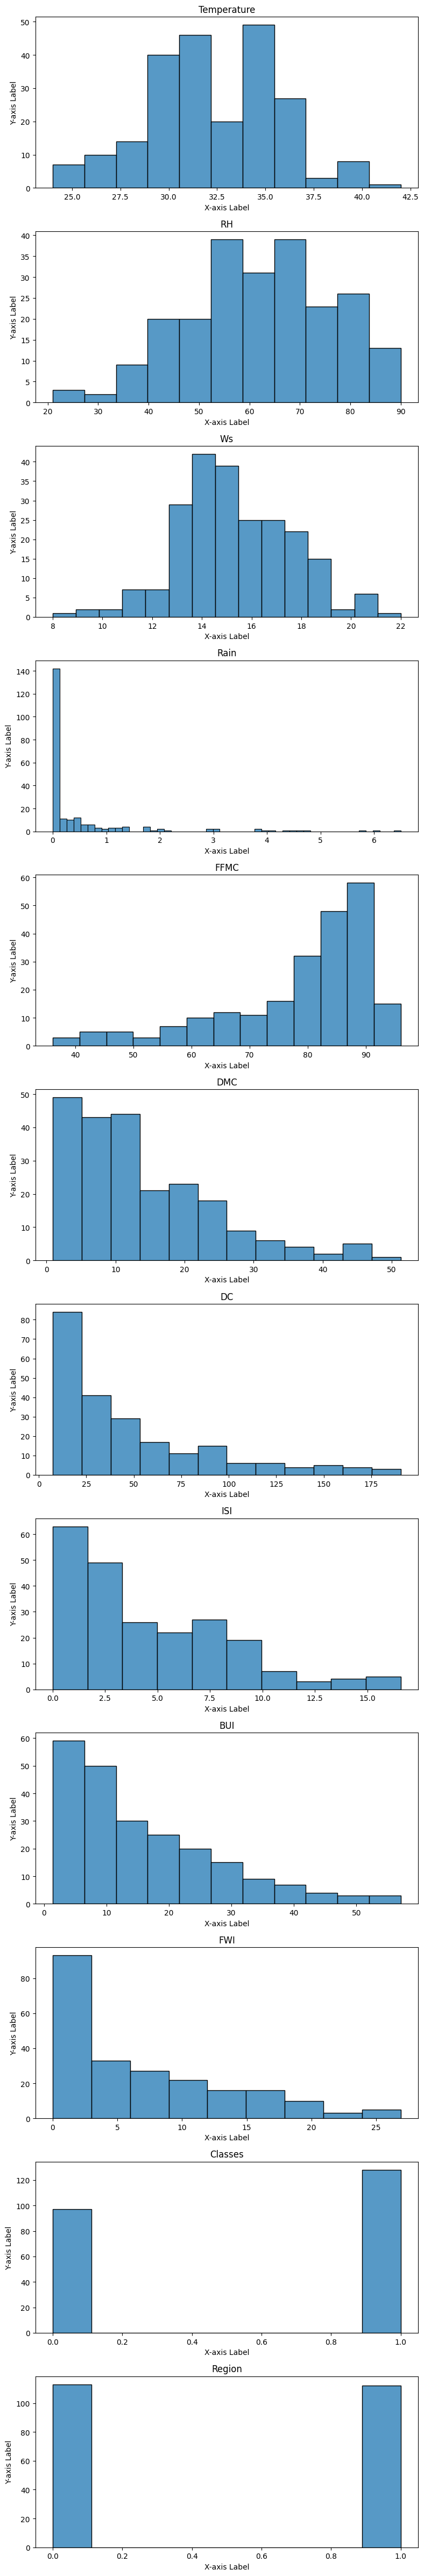

In [ ]:
#checking the distribution of the dataset visually
column_names = df_clean.columns

# Set the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, num_rows*4))

# Iterate over each column
for i, column in enumerate(column_names):
    # Select the appropriate subplot
    ax = axs[i] if num_rows > 1 else axs

    # Create a histplot for the column
    sns.histplot(data=df_clean, x=column, ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

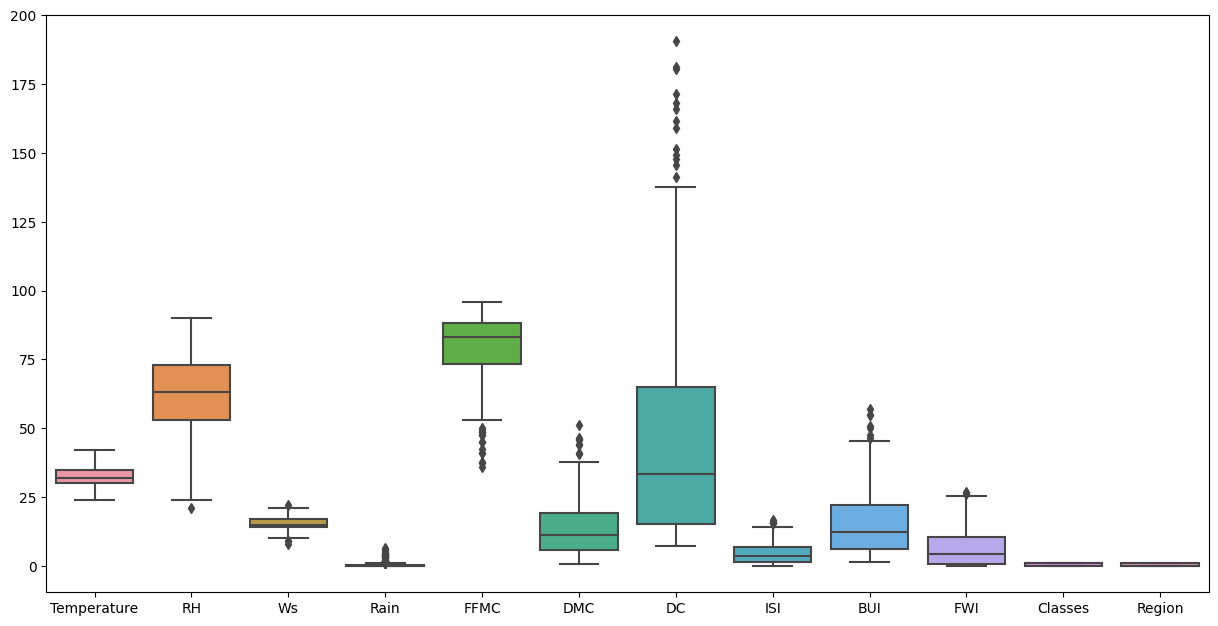

In [ ]:
plt.figure(figsize=(15,7.5))
sns.boxplot(df_clean)
plt.show()

In [ ]:
df_clean.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,32.288889,62.044444,15.337778,0.516000,78.556889,13.851556,47.222222,4.589778,15.812889,6.644889,0.568889,0.497778
std,3.443564,14.313386,2.460699,1.137554,13.117023,10.512268,42.948546,3.777014,12.227854,6.682285,0.496336,0.501110
min,24.000000,21.000000,8.000000,0.000000,36.100000,0.900000,7.300000,0.000000,1.400000,0.000000,0.000000,0.000000
25%,30.000000,53.000000,14.000000,0.000000,73.200000,6.000000,15.200000,1.500000,6.200000,0.800000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.200000,33.400000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.000000,17.000000,0.400000,88.100000,19.400000,65.100000,7.000000,22.300000,10.700000,1.000000,1.000000
max,42.000000,90.000000,22.000000,6.500000,96.000000,51.300000,190.600000,16.600000,57.100000,26.900000,1.000000,1.000000


In [ ]:
df_clean.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.641432,-0.294485,-0.200852,0.616826,0.496385,0.359179,0.591524,0.461497,0.565451,0.478049,0.244853
RH,-0.641432,1.000000,0.230766,0.143956,-0.623859,-0.388454,-0.196933,-0.658827,-0.330638,-0.557325,-0.403235,-0.372810
Ws,-0.294485,0.230766,1.000000,0.075252,-0.139947,-0.027116,0.083074,-0.003325,0.015686,0.016477,-0.070311,-0.180410
Rain,-0.200852,0.143956,0.075252,1.000000,-0.538388,-0.334842,-0.345521,-0.398287,-0.350550,-0.382235,-0.418653,0.105788
FFMC,0.616826,-0.623859,-0.139947,-0.538388,1.000000,0.625013,0.498437,0.761745,0.607390,0.712352,0.768969,0.192430
DMC,0.496385,-0.388454,-0.027116,-0.334842,0.625013,1.000000,0.851966,0.683494,0.977823,0.859217,0.595425,0.194770
DC,0.359179,-0.196933,0.083074,-0.345521,0.498437,0.851966,1.000000,0.498240,0.930754,0.708891,0.494086,-0.098382
ISI,0.591524,-0.658827,-0.003325,-0.398287,0.761745,0.683494,0.498240,1.000000,0.647477,0.943579,0.745867,0.231965
BUI,0.461497,-0.330638,0.015686,-0.350550,0.607390,0.977823,0.930754,0.647477,1.000000,0.842382,0.592394,0.081349
FWI,0.565451,-0.557325,0.016477,-0.382235,0.712352,0.859217,0.708891,0.943579,0.842382,1.000000,0.732173,0.179011


In [ ]:
df_clean.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0


Imagine you have a recipe that calls for ingredients in different units of measurement. For instance, it asks for flour in grams, sugar in cups, and butter in tablespoons. Now, you want to bake two batches of cookies, so you need to double the recipe. But since the ingredients are in different units, it's tricky to measure everything accurately.

Here's where scaling techniques come in:

Scaling is like converting all your recipe ingredients to a consistent unit, making it easier to understand and follow the recipe accurately.

#Robust Scaler:
Imagine you have a group of friends who are all telling you their ages. Most of them are honest, but you have that one friend who's known for giving extreme answers, like claiming to be 100 years old when they're not. If you calculate the average age, that one friend's answer can throw it off significantly.
Robust scaling is like finding the "middle" age in your group that's not affected by your extreme friend. It uses the median (the middle value) and a special trick to make sure your friend's answer doesn't have too much influence. It's helpful when you have a friend who's an outlier and you want to keep the middle value stable.
#Standard Scaler:
Think of your friends' ages again. This time, you want to see how each age compares to the average age in your group. If the average age is 30, and one friend is 35, you'd say they're 5 years older than the average.
Standard scaling is like measuring the "distance" of each age from the average age. It uses the average and standard deviation (a measure of how spread out the ages are). It's useful when you want to see how different ages are from the group's typical age, making comparisons easier.
#Min-Max Scaler:
Now, let's say you have a group of friends from different countries, and they're telling you their heights in different units, like inches and centimeters. To compare their heights, you need to convert everything to a common scale.
Min-Max scaling is like converting all the heights to a scale from 0 to 1, where 0 is the shortest friend and 1 is the tallest. It makes sure everyone's height is on the same scale, making it easy to see who's the tallest and shortest, regardless of the original units.

So, in simple terms:
Robust Scaler is good when you have a friend who gives extreme answers, and you want to find a stable "middle" value that isn't affected by them.
Standard Scaler is like measuring the "distance" of each value from the average, which helps you see how different they are from the typical value in your group.
Min-Max Scaler is about converting values to a common scale (like 0 to 1) so you can easily compare them, just like converting heights to a common unit for easy comparison.

In [ ]:
scaler=RobustScaler()
df_clean_scale=scaler.fit_transform(df_clean)

In [ ]:
df_clean_scale=pd.DataFrame(df_clean_scale)

In [ ]:
df_clean_scale.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.057778,-0.047778,0.112593,1.290000,-0.318330,0.197877,0.276998,0.198141,0.211981,0.246958,-0.431111,0.497778
std,0.688713,0.715669,0.820233,2.843884,0.880337,0.784498,0.860692,0.686730,0.759494,0.674978,0.496336,0.501110
min,-1.600000,-2.100000,-2.333333,0.000000,-3.167785,-0.768657,-0.523046,-0.636364,-0.683230,-0.424242,-1.000000,0.000000
25%,-0.400000,-0.500000,-0.333333,0.000000,-0.677852,-0.388060,-0.364729,-0.363636,-0.385093,-0.343434,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.500000,0.666667,1.000000,0.322148,0.611940,0.635271,0.636364,0.614907,0.656566,0.000000,1.000000
max,2.000000,1.350000,2.333333,16.250000,0.852349,2.992537,3.150301,2.381818,2.776398,2.292929,0.000000,1.000000


In [ ]:
df_clean_scale.columns=[	'Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes','Region']

In [ ]:
df_clean_scale.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.057778,-0.047778,0.112593,1.290000,-0.318330,0.197877,0.276998,0.198141,0.211981,0.246958,-0.431111,0.497778
std,0.688713,0.715669,0.820233,2.843884,0.880337,0.784498,0.860692,0.686730,0.759494,0.674978,0.496336,0.501110
min,-1.600000,-2.100000,-2.333333,0.000000,-3.167785,-0.768657,-0.523046,-0.636364,-0.683230,-0.424242,-1.000000,0.000000
25%,-0.400000,-0.500000,-0.333333,0.000000,-0.677852,-0.388060,-0.364729,-0.363636,-0.385093,-0.343434,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.500000,0.666667,1.000000,0.322148,0.611940,0.635271,0.636364,0.614907,0.656566,0.000000,1.000000
max,2.000000,1.350000,2.333333,16.250000,0.852349,2.992537,3.150301,2.381818,2.776398,2.292929,0.000000,1.000000


In [ ]:
df_clean_scale.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.641432,-0.294485,-0.200852,0.616826,0.496385,0.359179,0.591524,0.461497,0.565451,0.478049,0.244853
RH,-0.641432,1.000000,0.230766,0.143956,-0.623859,-0.388454,-0.196933,-0.658827,-0.330638,-0.557325,-0.403235,-0.372810
Ws,-0.294485,0.230766,1.000000,0.075252,-0.139947,-0.027116,0.083074,-0.003325,0.015686,0.016477,-0.070311,-0.180410
Rain,-0.200852,0.143956,0.075252,1.000000,-0.538388,-0.334842,-0.345521,-0.398287,-0.350550,-0.382235,-0.418653,0.105788
FFMC,0.616826,-0.623859,-0.139947,-0.538388,1.000000,0.625013,0.498437,0.761745,0.607390,0.712352,0.768969,0.192430
DMC,0.496385,-0.388454,-0.027116,-0.334842,0.625013,1.000000,0.851966,0.683494,0.977823,0.859217,0.595425,0.194770
DC,0.359179,-0.196933,0.083074,-0.345521,0.498437,0.851966,1.000000,0.498240,0.930754,0.708891,0.494086,-0.098382
ISI,0.591524,-0.658827,-0.003325,-0.398287,0.761745,0.683494,0.498240,1.000000,0.647477,0.943579,0.745867,0.231965
BUI,0.461497,-0.330638,0.015686,-0.350550,0.607390,0.977823,0.930754,0.647477,1.000000,0.842382,0.592394,0.081349
FWI,0.565451,-0.557325,0.016477,-0.382235,0.712352,0.859217,0.708891,0.943579,0.842382,1.000000,0.732173,0.179011


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()#This initializes an empty set col_corr to store the names
                    #of columns that are found to be correlated based on the threshold.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(df_clean_scale,0.85)

{'BUI', 'DC', 'FWI'}

In [ ]:
df_clean_scale=df_clean_scale.drop(['BUI'],axis=1)

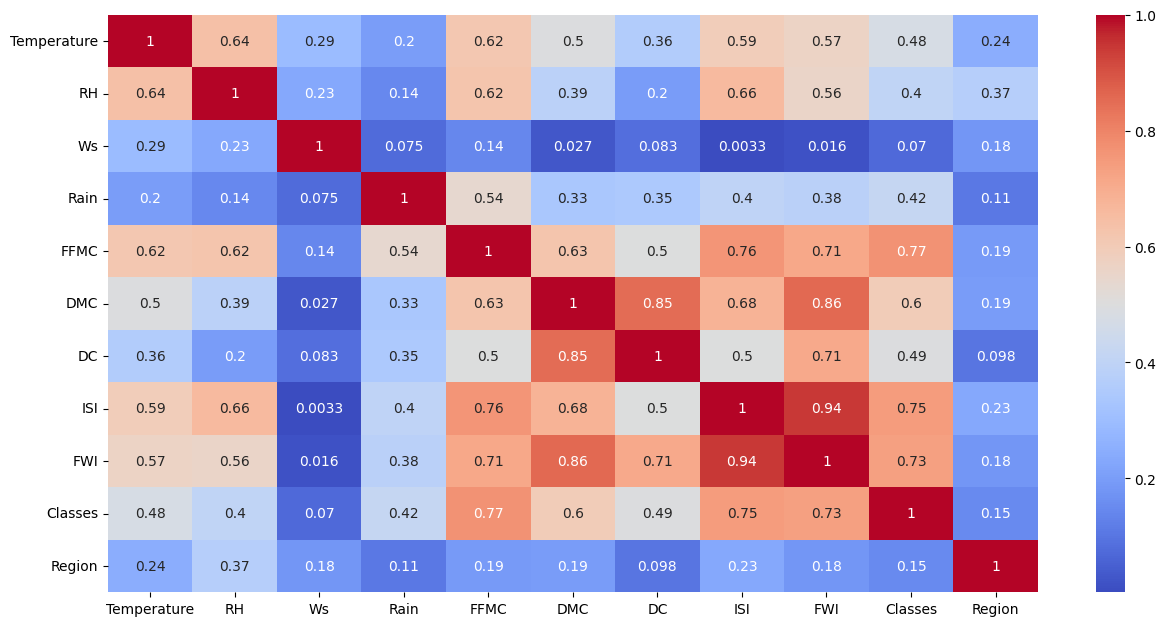

In [ ]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df_clean_scale.corr().abs(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
feature_var=df_clean_scale.var()
feature_var

Temperature    0.474325
RH             0.512183
Ws             0.672782
Rain           8.087679
FFMC           0.774993
DMC            0.615436
DC             0.740791
ISI            0.471598
FWI            0.455596
Classes        0.246349
Region         0.251111
dtype: float64

In [ ]:
#Defining the x and y variable
x=df_clean_scale.drop('FWI',axis=1)
y=df_clean_scale['FWI']

In [ ]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,-0.6,-0.30,1.000000,0.00,-1.181208,-0.582090,-0.517034,-0.400000,-1.0,0.0
1,-0.6,-0.10,-0.666667,3.25,-1.268456,-0.529851,-0.517034,-0.454545,-1.0,0.0
2,-1.0,0.70,0.333333,0.00,-1.241611,-0.611940,-0.384770,-0.418182,-1.0,0.0
3,-0.2,0.20,-0.333333,0.00,-0.046980,-0.402985,-0.224449,-0.072727,0.0,0.0
4,0.2,-0.45,-0.666667,0.00,0.328859,-0.097015,-0.058116,0.527273,0.0,0.0


In [ ]:
y.head()

0   -0.373737
1   -0.383838
2   -0.373737
3   -0.171717
4    0.303030
Name: FWI, dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression

#Imagine you have a secret family recipe for a special dish, like spaghetti sauce. Your grandma makes it, your mom makes it, and now it's your turn to cook it. But here's the catch: each generation of your family has their own way of making it, and they all insist it's the "best" way. So, you have a recipe with some flexibility.

Now, let's relate this to the concept of a variance threshold:

#Variance:
In cooking, variance means how much you can change the recipe and still have it taste good. It's like the amount of wiggle room you have while following the family recipe.

#Variance Threshold:
A variance threshold is like a limit you set for how much you're willing to deviate from the original recipe. If you go beyond this limit, your dish might not taste like the special family dish anymore.

#Why It Matters:
Having a variance threshold is essential because it helps maintain the unique taste of your family's special recipe. It ensures that, while you can make some tweaks, you don't stray too far from what makes it special.

#Example:
Let's say the original recipe calls for a pinch of oregano. You know that a pinch can be a bit flexible, so you add a little more or less, and it still tastes great. However, if you start using a cup of oregano instead of a pinch, you've crossed the variance threshold, and your dish may taste completely different, possibly not in a good way.

In data analysis, a variance threshold works similarly. It sets a limit for how much the data can vary while still being considered relevant and useful. Beyond this threshold, data might be too different from the norm and could impact the quality of your analysis or predictions. So, it's like ensuring you keep the essence of your family's special recipe intact while making your own delicious version.

#Information gain
is like a detective trying to solve a mystery. Imagine you have a big, complicated puzzle with many pieces, and you're trying to figure out what the complete picture looks like. To solve the puzzle, you start by picking the piece that reveals the most about the picture.

Here's how it works:

#Big Puzzle:
Imagine you have a puzzle with lots of pieces. Each piece has a tiny part of the overall picture.

#Choosing the Right Piece:
To solve the puzzle efficiently, you want to pick the pieces that give you the most useful information. It's like selecting the pieces that show a key part of the picture, like a corner piece or a piece with a unique pattern.

#Revealing the Picture:
As you keep finding and connecting these important pieces, the puzzle starts to take shape. You uncover more and more of the complete picture.

In the world of data and information gain:

Data is like the puzzle, and each piece (data point or feature) contains a bit of information.
Information gain is like choosing the most informative puzzle piece, the one that tells you the most about what's going on in your data.
By selecting the right pieces (features with high information gain), you can uncover the hidden patterns and understand your data better.
So, in a nutshell, information gain is a way of finding the most valuable pieces of information in your data to help you solve the "puzzle" and gain insights from it.

In [ ]:
threashold=0.1
selector=VarianceThreshold(0.1)
selector_data=selector.fit_transform(x)
selected_columns=selector.get_feature_names_out()
selected_indices=selector.get_support()
print(selected_columns)
print(selected_indices)

['Temperature' 'RH' 'Ws' 'Rain' 'FFMC' 'DMC' 'DC' 'ISI' 'Classes' 'Region']
[ True  True  True  True  True  True  True  True  True  True]


##Question 1: What is the variance threshold in feature selection, and why is it important in machine learning?

Answer: Variance threshold is a technique used in feature selection to remove features (columns) from a dataset that have very low variance, meaning they don't vary much across the dataset. In machine learning, features with low variance may not provide valuable information for modeling, and keeping them can lead to overfitting or increased computational overhead. Removing low-variance features helps improve the efficiency and effectiveness of machine learning models.

##Question 2: How is variance calculated for a feature in a dataset?

Answer: Variance for a feature in a dataset is calculated using the following formula:

Variance=summition(original datapoint-mean of the series of the datapoint)/no of datapoints.

##Question 3: What is the purpose of applying a variance threshold in feature selection?

Answer: The main purpose of applying a variance threshold in feature selection is to reduce the dimensionality of the dataset and eliminate features that do not contribute significantly to the prediction or classification task. It helps in improving model performance by focusing on relevant features and reducing the risk of overfitting. Additionally, it can lead to faster model training and reduced computational resources.

##Question 4: How do you decide on an appropriate threshold for variance?

Answer: The choice of an appropriate threshold for variance depends on the specific dataset and the problem at hand. It typically involves a trade-off between removing noise and retaining potentially useful information. Commonly, a threshold is chosen based on domain knowledge, experimentation, or by analyzing the distribution of variances across features. Alternatively, you can perform feature selection with different thresholds and use cross-validation to determine the threshold that leads to the best model performance.

##Question 5: Can setting a variance threshold too high or too low have negative consequences?

Answer: Yes, setting a variance threshold too high may lead to the removal of features that contain valuable information, potentially resulting in underfitting or loss of important patterns in the data. On the other hand, setting the threshold too low may retain noisy features, increasing the risk of overfitting and requiring more computational resources. Therefore, choosing an appropriate threshold is crucial to achieving a balance between feature reduction and model performance.

##Q: What challenges might you encounter when using a variance threshold for feature selection?

A:
One challenge is determining the appropriate threshold. Setting it too high might remove features that could be valuable, while setting it too low might retain features with insignificant variance. Another challenge is understanding the context of the problem - some features might have low variance naturally and yet be crucial for the model. Careful analysis and domain knowledge are essential to overcome these challenges.

##Q: Can you explain a scenario where using a variance threshold significantly improved the model's performance?

A:
In a scenario involving a dataset with multiple features describing customer behavior, the dataset contained a few features (e.g., customer ID, constant values) with negligible variance. By applying a variance threshold, these uninformative features were removed, leading to a streamlined dataset. Consequently, the machine learning model's training time reduced, and its performance improved because it focused on relevant features, avoiding noise from the low-variance ones.

##Q: Are there situations where applying a variance threshold might not be suitable?

A:
Yes, in situations where the low-variance features are domain-specific and known to be important, blindly applying a variance threshold might lead to the loss of crucial information. Additionally, in some cases where the dataset is already small, removing features without a thorough understanding of their significance could result in a lack of information, hindering the model's ability to learn effectively.

In [ ]:
information_gains=mutual_info_regression(x,y)

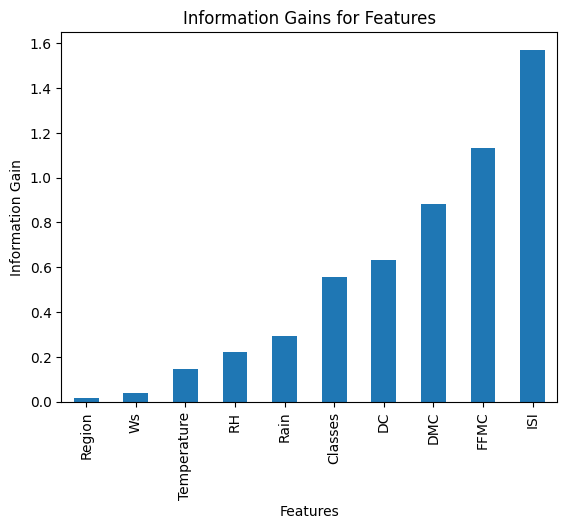

In [ ]:
# Convert the NumPy array to a Pandas Series
information_gains_series = pd.Series(information_gains, index=x.columns).sort_values()

# Plot the Information Gains as a bar chart
information_gains_series.plot(kind='bar')
plt.title("Information Gains for Features")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.show()

In [ ]:
# Print the Information Gains for each feature
for feature_name, info_gain in zip(x.columns, information_gains):
    print(f"Feature: {feature_name}, Information Gain: {info_gain:.4f}")

Feature: Temperature, Information Gain: 0.1449
Feature: RH, Information Gain: 0.2213
Feature: Ws, Information Gain: 0.0389
Feature: Rain, Information Gain: 0.2946
Feature: FFMC, Information Gain: 1.1320
Feature: DMC, Information Gain: 0.8838
Feature: DC, Information Gain: 0.6298
Feature: ISI, Information Gain: 1.5709
Feature: Classes, Information Gain: 0.5539
Feature: Region, Information Gain: 0.0178


##Question 1:
Q: What is Information Gain in the context of feature selection?

A:
Information Gain is a metric used in feature selection to measure the reduction in entropy or uncertainty in a dataset when a particular feature is included. It quantifies how much a feature contributes to making predictions or classifying data points correctly.

##Q: How is Information Gain calculated, and what does a high Information Gain value indicate?

A:
Information Gain is calculated using entropy. The formula is as follows:
Information Gain
=
Entropy(parent)
−
∑Entropy(child Information Gain=Entropy(parent)−∑(
NN i⋅Entropy(child i​))
A high Information Gain value indicates that adding the feature to the model results in a significant reduction in uncertainty or entropy, making it a valuable predictor.

##Question 3:
Q: Can Information Gain be used with any type of data, or are there specific data types for which it is more suitable?

A:
Information Gain is commonly used with categorical data, particularly in decision tree-based algorithms. It can also be adapted for numerical data by discretizing it into bins. However, for continuous data, other metrics like Gini Impurity or Mean Squared Error reduction may be more appropriate.

##Question 4:
Q: How is Information Gain used in decision tree algorithms for feature selection?

A:
In decision trees, Information Gain is used to determine the order in which features are split. The feature with the highest Information Gain is chosen as the root node of the tree. Then, the process is repeated recursively for the child nodes, selecting the feature with the highest Information Gain at each step to create a tree that best separates the data.

##Question 5:
Q: What are the limitations or potential drawbacks of using Information Gain for feature selection?

A:
Information Gain tends to favor features with many distinct values (high cardinality) as they can potentially lead to a greater reduction in entropy. This can result in overlooking features with lower cardinality that may still be informative. Additionally, Information Gain doesn't handle continuous numerical features well without discretization.

##Q: Can you explain a scenario where Information Gain played a crucial role in improving a machine learning model's performance?

A:
In a spam email classification problem, Information Gain was used to select features (words or phrases) that provided the most significant reduction in uncertainty when distinguishing between spam and non-spam emails. By focusing on these informative features, the model achieved better accuracy in identifying spam emails, leading to improved performance.

##Question 7:
Q: How do you handle missing data when calculating Information Gain for feature selection?

A:
Handling missing data is essential. Typically, you can impute missing values with a placeholder value or use techniques like mean imputation or more advanced imputation methods. The choice of imputation method can affect Information Gain calculations and, subsequently, feature selection.



```
# This is formatted as code
```

##Splitting the data

##Question 1:
Q: What is the purpose of the train-test split in machine learning?

A:
The train-test split is used to divide a dataset into two parts: one for training a machine learning model (the training set) and another for evaluating its performance (the test set). It helps in assessing how well the model generalizes to unseen data and avoids overfitting.

##Question 2:
Q: What is the typical ratio for splitting a dataset into a training set and a test set?

A:
A common ratio is 70-80% of the data for training and the remaining 20-30% for testing. However, the exact split ratio can vary depending on the size and nature of the dataset, the problem at hand, and the available data.

##Question 3:
Q: What are some potential issues with using a very small test set during the train-test split?

A:
Using a very small test set can result in high variability in performance metrics, making it difficult to assess a model's true generalization performance. It may also lead to unreliable conclusions about model performance and may not detect overfitting effectively.

##Question 4:
Q: What precautions should you take to ensure a fair train-test split?

A:
To ensure a fair train-test split:

Shuffle the dataset before splitting to remove any order-related biases.
Ensure that both the training and test sets are representative of the overall dataset.
Maintain the class distribution (for classification problems) in both sets, especially in imbalanced datasets.
Use stratified sampling when necessary, ensuring that each class is proportionally represented.
##Question 5:
Q: What is the danger of data leakage in the train-test split, and how can you prevent it?

A:
Data leakage occurs when information from the test set unintentionally influences the training process. To prevent data leakage, ensure that all data preprocessing steps (e.g., scaling, feature engineering) are applied separately to the training and test sets. Additionally, avoid using any test set information during model training, such as using test set statistics or target values.

##Question 6:
Q: When might you consider using a validation set in addition to a train-test split?

A:
A validation set is useful when you need to perform hyperparameter tuning or model selection. It allows you to evaluate different model configurations on a separate dataset before finalizing the model with the test set. This helps prevent overfitting hyperparameters to the test set.

##Question 7:
Q: How can you evaluate a model's performance using the test set after the train-test split?

A:
You can evaluate a model's performance using various metrics, depending on the type of problem. Common evaluation metrics include accuracy, precision, recall, F1-score, ROC AUC, mean squared error (MSE), and others. The choice of metric depends on whether the problem is classification, regression, or another type.

##Question 8:
Q: What is the purpose of setting a random seed when performing a train-test split?

A:
Setting a random seed ensures reproducibility. It makes the train-test split deterministic, so every time you split the data, you get the same result. This is important when you want to compare or share results with others or when you need to reproduce your experiments.

##Question 9:
Q: Can you explain the concept of cross-validation and how it relates to the train-test split?

A:
Cross-validation is a technique used to repeatedly split the data into training and test sets to assess a model's performance. It helps in obtaining a more robust estimate of a model's performance by averaging over multiple splits. The train-test split is a basic form of cross-validation, specifically the "holdout" method, where you split the data into two sets once. Other cross-validation methods, like k-fold cross-validation, involve multiple train-test splits.

##Question 10:
Q: What are some best practices for choosing a random seed for the train-test split?

A:

Use a fixed random seed for reproducibility in your experiments.
Choose a random seed that is unlikely to conflict with other random processes in your code.
Document the chosen random seed to ensure consistency in future runs and when sharing code with others.

#Train-test split is like setting aside a portion of your candies before you start eating the rest to see if you like them, without finishing the entire bag.

In [ ]:
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

In [ ]:
x_train.shape

(180, 10)

In [ ]:
y_train.shape

(180,)

In [ ]:
x_test.shape

(45, 10)

In [ ]:
y_test.shape

(45,)

##Support vector regression

#Certainly! Let's explain Support Vector Regression (SVR) in simple terms.

Imagine you're playing a game of darts. Your goal is to throw darts as close as possible to the center of a target. In SVR, the idea is somewhat similar: we're trying to get as close as possible to the "bullseye" when making predictions.

#Here's how SVR works:

The Dartboard: Think of the target (dartboard) as a graph with points that represent data. In SVR, these points represent the relationship between two things, like the number of hours someone studies and their exam scores.

The Bullseye: Imagine there's a small bullseye at the center of the dartboard, and that's where you want your darts to land. In SVR, this "bullseye" represents the best predictions – getting as close as possible to the true values.

The Margin: Now, draw a margin (a safe zone) around the bullseye. This margin is like an acceptable range for your predictions. In SVR, we allow for some error in our predictions, just like you might accept being a little off the exact center of the dartboard.

The Line: Draw a line on the dartboard that's as close as possible to the bullseye while still staying within the margin. This line represents our prediction model in SVR. It tries to make the best predictions while staying within an acceptable error range.

Training the Model: To find this line, SVR looks at the data points and adjusts the line to fit the points as closely as possible, ensuring that most of the points are within the margin. It's like finding the best angle to throw darts to get them as close to the bullseye as possible.

Making Predictions: Once the line is determined, you can use it to make predictions. If you have a new point (e.g., someone's study hours), you throw your "dart" (data point) and see where it lands on the dartboard (predicting the outcome).

So, in simple terms, Support Vector Regression is like aiming for the bullseye in a game of darts. It's a way to predict outcomes while allowing for a little margin of error, and it finds the best line (model) to make those predictions as accurate as possible.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x750 with 0 Axes>

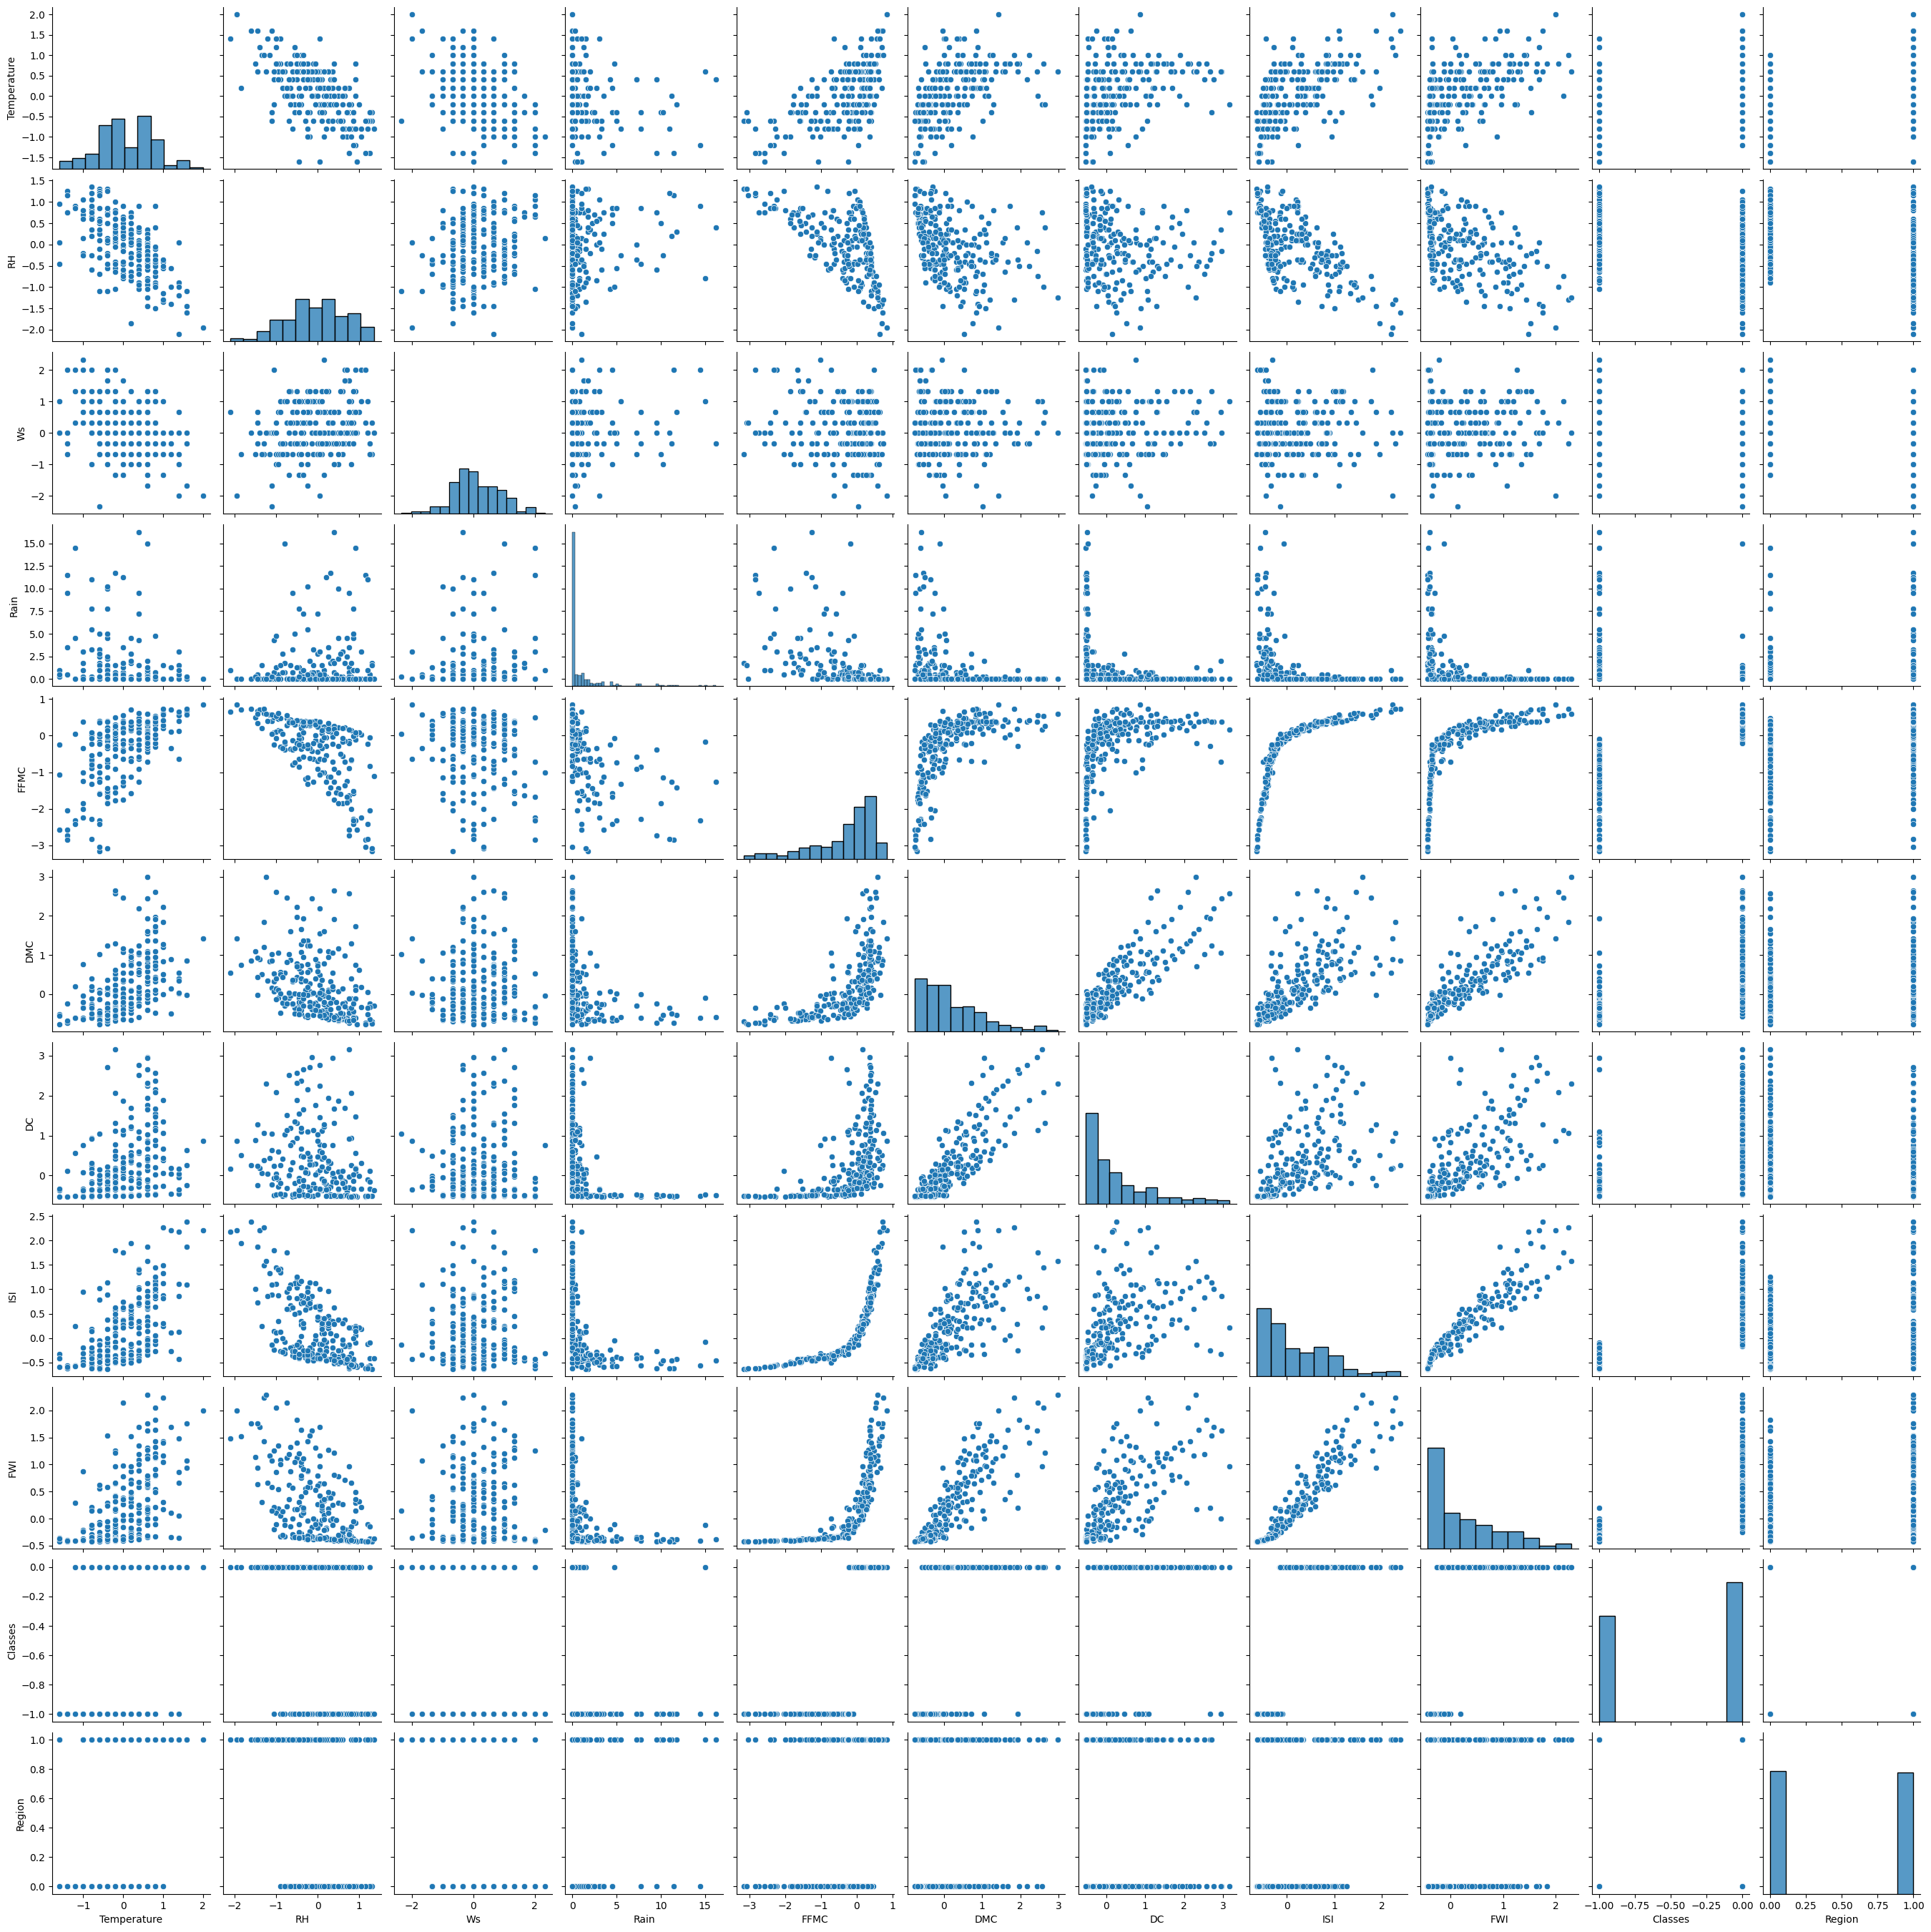

In [ ]:
#before fitting the svm regressor model lets check what kind of relationship is there in our data set
plt.figure(figsize=(15,7.5))
sns.pairplot(df_clean_scale)
plt.show

#In Support Vector Machines (SVM), the choice of kernel function is a crucial aspect that determines how the SVM maps data into a higher-dimensional space for classification or regression. Different kernel functions can be used to capture different types of relationships in the data. Here are some common kernel functions used in SVM, along with explanations and examples:

##Linear Kernel:

Kernel Function: K(x, y) = x * y
Explanation: The linear kernel is the simplest and works well when the data is linearly separable, i.e., you can draw a straight line to separate the classes. It calculates the inner product between the data points in the original feature space.
Example: Suppose you have two classes of data that can be separated by a straight line, like in a binary classification problem.
Polynomial Kernel:

##Kernel Function: K(x, y) = (ax * y + c)^d
Explanation: The polynomial kernel maps data into a higher-dimensional space using a polynomial function. The 'd' parameter controls the degree of the polynomial, and 'a' and 'c' are scaling factors.
Example: When data is not linearly separable, a polynomial kernel can create decision boundaries that are polynomial curves, making it suitable for problems with more complex patterns.
Radial Basis Function (RBF) Kernel:

##Kernel Function: K(x, y) = exp(-γ * ||x - y||^2)
Explanation: The RBF kernel, also known as the Gaussian kernel, maps data into an infinite-dimensional space. It is highly effective in capturing complex and non-linear relationships. The 'γ' parameter controls the width of the Gaussian function.
Example: RBF kernels are suitable for a wide range of problems, especially when the decision boundary is not easily defined by a simple shape.
Sigmoid Kernel:

##Kernel Function: K(x, y) = tanh(ax * y + c)
Explanation: The sigmoid kernel is based on the hyperbolic tangent function and is used in neural networks and SVMs. It is suitable for problems where the data distribution is somewhat sigmoidal.
Example: When data follows a sigmoid-like pattern, the sigmoid kernel can be useful.
##Custom Kernels:

Explanation: You can also define custom kernels tailored to the specific characteristics of your data. Custom kernels allow you to capture domain-specific relationships between data points.
Example: Suppose you are working with a dataset where domain knowledge suggests a particular transformation of the data that may improve classification accuracy.
The choice of the kernel function depends on the nature of the data and the problem you are trying to solve. It often requires experimentation and tuning to find the kernel that works best for your specific application. SVMs, with their versatility in kernel selection, are powerful tools for both linear and non-linear classification and regression tasks.

##1. What is a kernel in the context of Support Vector Machines (SVM)?

Answer: A kernel in SVM is a function that calculates the similarity between pairs of data points in the feature space. It is used to map data into a higher-dimensional space, where a linear decision boundary can be found.

##2. Can you name some common types of SVM kernels?

Answer: Common types of SVM kernels include:

Linear Kernel
Polynomial Kernel
Radial Basis Function (RBF) Kernel
Sigmoid Kernel
##3. Explain the Linear Kernel. When is it most suitable?

Answer: The Linear Kernel, represented as K(x, y) = x * y, is suitable when the data is linearly separable. It calculates the inner product between data points in the original feature space. It works well when the decision boundary is a straight line.

##4. What is the Polynomial Kernel, and how does it work?

Answer: The Polynomial Kernel, represented as K(x, y) = (ax * y + c)^d, is used to map data into a higher-dimensional space using a polynomial function. The 'd' parameter controls the degree of the polynomial, and 'a' and 'c' are scaling factors. It is suitable for capturing non-linear relationships in the data.

##5. Describe the Radial Basis Function (RBF) Kernel. When is it useful?

Answer: The RBF Kernel, represented as K(x, y) = exp(-γ * ||x - y||^2), is also known as the Gaussian Kernel. It maps data into an infinite-dimensional space and is highly effective in capturing complex and non-linear relationships. The 'γ' parameter controls the width of the Gaussian function. RBF is useful when data has non-linear patterns.

##6. What is the Sigmoid Kernel, and when might you use it?

Answer: The Sigmoid Kernel, represented as K(x, y) = tanh(ax * y + c), is based on the hyperbolic tangent function. It is used when data has a sigmoid-like pattern, and the kernel can capture such relationships. It's also used in neural networks and SVMs for specific scenarios.

##7. When might you consider creating a custom kernel in SVM?

Answer: Custom kernels are created when domain knowledge suggests a particular transformation of the data that can improve classification accuracy. Custom kernels are useful when standard kernels do not adequately capture the data's characteristics.

##8. How do you choose the appropriate SVM kernel for a specific problem?

Answer: The choice of the SVM kernel depends on the nature of the data and the problem at hand. You may consider factors like the linearity of the data, the presence of non-linear relationships, and domain knowledge. Experimentation and cross-validation are often used to determine the best-performing kernel.

##9. What is the significance of kernel parameters (e.g., degree, γ) in SVM kernels?

Answer: Kernel parameters, such as the degree in a polynomial kernel and γ in an RBF kernel, control the shape and behavior of the kernel function. Tuning these parameters is crucial as they affect the model's ability to capture the data's underlying patterns. For example, a higher degree in a polynomial kernel makes it more flexible, while a smaller γ in an RBF kernel can make it more localized.

##10. Can you apply PCA to reduce the dimensionality of the data before using SVM with kernels?

Answer: Yes, you can apply Principal Component Analysis (PCA) to reduce the dimensionality of the data before using SVM with kernels. Dimensionality reduction can help improve computational efficiency and reduce overfitting in high-dimensional spaces. However, you should carefully choose the number of components to retain, as losing too much information can harm the model's performance.

First of all will fit the svm re3gressor as it is in the next step will hypertune our model with kernals and see with which kernal we are getting the best result

In [ ]:
from sklearn.svm import SVR
model0=SVR(kernel='linear')

In [ ]:
model0.fit(x_train,y_train)
y_pred_train=model0.predict(x_train)
y_pred_test=model0.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
train_accuracy=r2_score(y_train,y_pred_train)
test_accuracy=r2_score(y_test,y_pred_test)
train_accuracy

0.986702050514994

In [ ]:
test_accuracy

0.9753281518313763

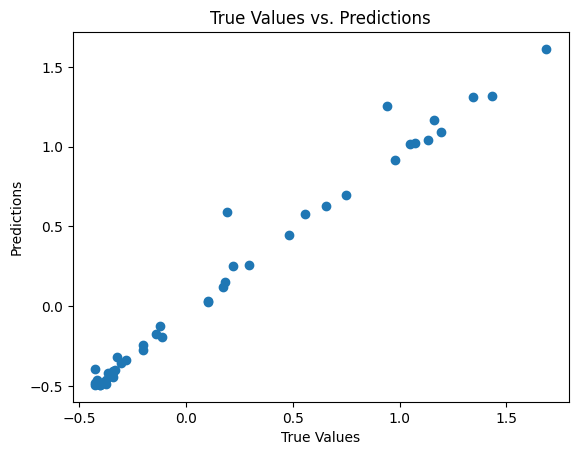

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()

In [ ]:
model_01=SVR(kernel='rbf')

In [ ]:
model_01.fit(x_train,y_train)
y_pred_train=model_01.predict(x_train)
y_pred_test=model_01.predict(x_test)

In [ ]:
train_accuracy=r2_score(y_train,y_pred_train)
test_accuracy=r2_score(y_test,y_pred_test)
train_accuracy

0.9897542298885093

In [ ]:
test_accuracy

0.9726713273455851

##HYPERPARAMETER TUNING OF SVR

#Here are some interview questions related to Support Vector Regression (SVR) constraints and the loss function, along with their explanations:

##1. What are the constraints in Support Vector Regression, and how do they differ from classification SVMs?

Explanation: In SVR, the primary constraint is to minimize the margin violation while ensuring that the prediction error (the difference between the actual target value and the predicted value) is within a certain tolerance (controlled by the epsilon parameter). Unlike classification SVMs, where the goal is to maximize the margin while keeping data points outside the margin, SVR focuses on minimizing the error within a margin.

##2. What is the epsilon-insensitive loss function in SVR, and why is it used?

Explanation: The epsilon-insensitive loss function is a hinge loss function that allows for a certain degree of error (epsilon) between the predicted and actual target values. It penalizes errors outside of this margin but does not penalize errors within the margin. This loss function is used in SVR to ensure that the model is less sensitive to small prediction errors and focuses on fitting the data within the margin.

##3. How does changing the value of the epsilon parameter affect the SVR model?

Explanation: The epsilon parameter controls the width of the margin within which prediction errors are not penalized. A larger epsilon allows for a wider margin and, therefore, more prediction errors to be tolerated. Smaller epsilon values lead to a narrower margin and less tolerance for prediction errors. The choice of epsilon impacts the trade-off between model complexity and model accuracy.

##4. Explain the role of support vectors in SVR and how they influence the regression model.

##Explanation: Support vectors are the data points closest to the decision boundary (the margin). In SVR, these support vectors have non-zero slack variables, meaning they either violate the margin or are within the margin. The support vectors play a crucial role in defining the regression function. They contribute to the construction of the decision boundary and effectively determine the shape of the regression model.

##5. What is the objective of SVR, and how does it relate to the loss function and constraints?
Explanation: The objective of SVR is to find a regression function that fits the data while minimizing the prediction error within a margin (controlled by epsilon) and penalizing errors outside of this margin. The loss function measures the errors, and the constraints ensure that these errors remain within the margin. The combination of the loss function and constraints in SVR aims to strike a balance between model accuracy and complexity.

##6. Can you explain the different types of loss functions used in SVR, such as epsilon-insensitive loss and quadratic loss?

Explanation: Epsilon-insensitive loss and quadratic loss are two common loss functions in SVR. Epsilon-insensitive loss allows for a certain error margin (epsilon) and penalizes errors outside of this margin. Quadratic loss, on the other hand, squares the errors, which can be more sensitive to outliers. The choice of loss function depends on the problem and the desired behavior of the SVR model.

Support Vector Regression (SVR) can be a complex topic, and interviewers might ask challenging questions to assess your in-depth understanding of the subject. Here are some tough SVR interview questions along with detailed explanations:

**1. Explain the concept of the epsilon parameter in SVR and its impact on the model's flexibility and accuracy.

Explanation: The epsilon parameter in SVR defines the margin of tolerance around the predicted value. It allows for a certain degree of error (epsilon) within which errors are not penalized. A larger epsilon allows more data points to fall within the margin, making the model more flexible but potentially less accurate. Conversely, a smaller epsilon results in a narrower margin, making the model less flexible but potentially more accurate. The choice of epsilon balances model complexity and accuracy, and it's crucial for tuning the SVR model to the specific problem.

**2. How does the choice of kernel function influence the SVR model's performance, especially when dealing with non-linear data?

Explanation: The kernel function in SVR maps the input features into a higher-dimensional space, allowing the model to capture non-linear patterns. The choice of the kernel function significantly affects the model's ability to fit complex data. For instance:

Linear Kernel: Suitable for linear data, it assumes a linear relationship between input features and the target variable.
RBF (Radial Basis Function) Kernel: Highly versatile for capturing non-linear patterns, especially when the decision boundary is complex and irregular.
Polynomial Kernel: Useful for capturing polynomial relationships in the data.
Sigmoid Kernel: Appropriate for data that exhibits a sigmoidal relationship.
Choosing the right kernel function involves understanding the underlying data patterns and experimenting to find the one that best fits the data.

**3. What is the role of the regularization parameter (C) in SVR, and how does it impact the trade-off between overfitting and underfitting?

Explanation: The regularization parameter 'C' in SVR balances the trade-off between fitting the training data well and maintaining a smooth decision boundary. A smaller 'C' encourages a wider margin, allowing more support vectors and tolerating errors, which can lead to underfitting if the data is complex. Conversely, a larger 'C' enforces a narrower margin, reducing the number of support vectors and penalizing errors more, which can lead to overfitting if 'C' is too high for the data. Proper tuning of 'C' is crucial to prevent overfitting or underfitting and achieve a well-generalized model.

**4. Explain the concept of the kernel trick in SVR. How does it enable SVR to handle non-linear data?

Explanation: The kernel trick in SVR allows the algorithm to implicitly map the input features into a higher-dimensional space without explicitly computing the transformed features. This mapping is done by using a kernel function, such as the RBF or polynomial kernel. In the higher-dimensional space, SVR constructs a linear regression model, allowing it to capture complex non-linear patterns. The kernel trick is computationally efficient and helps SVR handle non-linear data without explicitly calculating the transformed feature vectors, making it feasible to work with high-dimensional or even infinite-dimensional spaces.

**5. Discuss the impact of outliers on SVR. How can SVR be made robust to outliers?

Explanation: Outliers can significantly influence SVR models, especially when using loss functions that are sensitive to large errors. Outliers can distort the decision boundary and affect the support vectors, leading to a less accurate model. To make SVR robust to outliers, techniques like robust loss functions (e.g., epsilon-insensitive loss), data preprocessing (e.g., outlier detection and removal), and feature scaling can be employed. Additionally, choosing appropriate kernel functions and tuning hyperparameters carefully can mitigate the impact of outliers on the SVR model's performance.

In [ ]:
model_02=SVR()
param_grid={'kernel':['linear','rbf','poly','sigmoid'],
            'C':[0.1,2,1,6],'epsilon':[1,0.1,2,10],}


In [ ]:
grid_search=GridSearchCV(model_02,param_grid=param_grid,scoring='r2',cv=10)
grid_search.fit(x_train,y_train)
best_param=grid_search.best_params_

In [ ]:
best_param

{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}

In [ ]:
best_model_02=SVR(**best_param)
best_model_02.fit(x_train,y_train)
y_pred_train=best_model_02.predict(x_train)
y_pred_test=best_model_02.predict(x_test)

In [ ]:
train_accu=r2_score(y_train,y_pred_train)
train_accu

0.9870721350637672

In [ ]:
test_accu=r2_score(y_test,y_pred_test)
test_accu

0.9788354583354535

#Fitting SVR With Principal Component Analysis Technique

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)

In [ ]:
x_train_pca=pd.DataFrame(x_train_pca)

In [ ]:
x_test_pca=pd.DataFrame(x_test_pca)

In [ ]:
x_train_pca.shape

(180, 4)

In [ ]:
x_test_pca.shape

(45, 4)

In [ ]:
model_03=SVR()
para_rand={'kernel':['linear','rbf','sigmoid','poly'],'epsilon':[1,0.1,0.2,5,3,8,7,0.7],'C':[1,3,2,0.1,0.3,0.5]}
random_search_cv=RandomizedSearchCV(model_03,param_distributions=para_rand,random_state=42,cv=20,n_iter=100,scoring='r2')
random_search_cv.fit(x_train_pca,y_train)

RandomizedSearchCV(cv=20, estimator=SVR(), n_iter=100,
                   param_distributions={'C': [1, 3, 2, 0.1, 0.3, 0.5],
                                        'epsilon': [1, 0.1, 0.2, 5, 3, 8, 7,
                                                    0.7],
                                        'kernel': ['linear', 'rbf', 'sigmoid',
                                                   'poly']},
                   random_state=42, scoring='r2')

In [ ]:
best_para_rands=random_search_cv.best_params_
best_para_rands

{'kernel': 'rbf', 'epsilon': 0.1, 'C': 2}

In [ ]:
best_svr_model_03=SVR(**best_para_rands)

In [ ]:
best_svr_model_03.fit(x_train_pca,y_train)

SVR(C=2)

In [ ]:
y_pred_train_pca=best_svr_model_03.predict(x_train_pca)
y_pred_test_pca=best_svr_model_03.predict(x_test_pca)

In [ ]:
train_accu_svr_pca=r2_score(y_train,y_pred_train_pca)
test_accu_svr_pca=r2_score(y_test,y_pred_test_pca)

In [ ]:
train_accu_svr_pca

0.9856779921611176

In [ ]:
test_accu_svr_pca

-0.5717644793028518

#Above Model is Overfit when fitted with PCA

#1. What is PCA, and why is it used in machine learning?

Explanation: PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining most of the important information. It is used in machine learning to address the "curse of dimensionality," reduce computational complexity, and improve model performance.

#2. How does PCA work, and what is the fundamental idea behind it?

Explanation: PCA works by finding the principal components, which are linear combinations of the original features that capture the most variance in the data. The fundamental idea is to identify orthogonal axes (principal components) that represent the most variation, and project the data onto these axes to reduce dimensionality.

#3. What are eigenvalues and eigenvectors in the context of PCA?

Explanation: Eigenvalues and eigenvectors are mathematical concepts used in PCA. Eigenvalues represent the amount of variance explained by each principal component, while eigenvectors represent the direction of these components. The largest eigenvalue corresponds to the first principal component, the second-largest to the second component, and so on.

#4. How do you select the number of principal components to retain during PCA?

Explanation: The number of principal components to retain depends on the problem and the desired level of dimensionality reduction. One common approach is to examine the explained variance ratio, typically represented as a cumulative sum of eigenvalues. Retaining components that collectively explain a high percentage (e.g., 95%) of the total variance is a common heuristic.

#5. What is the difference between PCA and t-SNE (t-Distributed Stochastic Neighbor Embedding) in dimensionality reduction?

Explanation: PCA is a linear dimensionality reduction technique that captures global structure and relationships in data. In contrast, t-SNE is a non-linear technique that emphasizes preserving local structure and is often used for data visualization.

#6. Can PCA be used for feature selection, and how does it differ from feature extraction?

Explanation: PCA can be used for feature extraction, not feature selection. Feature extraction transforms the original features into a new set of features (principal components), while feature selection involves choosing a subset of the original features to retain.

#7. What are the potential drawbacks or limitations of PCA?

Explanation: Some limitations of PCA include its sensitivity to outliers, linearity (it may not capture non-linear relationships well), and the potential loss of interpretability since principal components are linear combinations of original features.

#8. In what scenarios is PCA not recommended or may not be suitable?

Explanation: PCA may not be suitable when non-linear relationships dominate the data, when interpretability of the original features is crucial, or when outliers have a significant impact. In such cases, non-linear dimensionality reduction methods or other techniques might be more appropriate.

#9. How does PCA impact data visualization, and what are some advantages of using PCA for visualization?

Explanation: PCA is often used for data visualization because it reduces data to a lower dimension, making it easier to visualize. It retains much of the important variation, simplifies complex data, and helps reveal patterns that are not evident in high-dimensional space.

#10. What are some alternatives to PCA for dimensionality reduction, and when might you choose one over the other?

##1. What is Linear Regression?
Answer: Linear Regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more predictor variables by finding the linear relationship between them.

##2. What are the two types of Linear Regression?
Answer: Simple Linear Regression (SLR) and Multiple Linear Regression (MLR).

##3. Explain Simple Linear Regression (SLR).
Answer: SLR involves predicting a target variable using a single predictor variable. The relationship between the two variables is modeled as a straight line (linear).

##4. What is the formula for the equation of a straight line in SLR?
Answer: The formula is: y = b0 + b1 * x, where y is the target variable, x is the predictor variable, b0 is the intercept, and b1 is the slope.

##5. How are the coefficients (b0 and b1) in SLR calculated?
Answer: The coefficients are calculated using the method of least squares, which minimizes the sum of the squared differences between actual and predicted values.

##6. What is the purpose of the intercept (b0) in SLR?
Answer: The intercept (b0) represents the value of the target variable when the predictor variable is zero.

##7. Explain Multiple Linear Regression (MLR).
Answer: MLR extends SLR by allowing multiple predictor variables to be used in the regression model. It models the relationship between the target variable and multiple predictors linearly.

##8. What is the formula for the equation of a hyperplane in MLR?
Answer: The formula is: y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn, where y is the target variable, xi are the predictor variables, and bi are the coefficients.

##9. What is the purpose of the coefficients (bi) in MLR?
Answer: The coefficients represent the change in the target variable for a one-unit change in the corresponding predictor variable while keeping other variables constant.

##10. What is the difference between correlation and regression?
Answer: Correlation measures the strength and direction of a linear relationship between two variables without implying causation. Regression, on the other hand, models the relationship between variables and can be used for prediction and inference.

##11. What are the assumptions of Linear Regression?
Answer: The common assumptions include linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of errors.

##12. How can you check for multicollinearity in MLR?
Answer: Multicollinearity occurs when predictor variables are highly correlated. It can be checked using correlation matrices or variance inflation factors (VIFs).

##13. What is the residual in Linear Regression?
Answer: A residual is the difference between the actual value of the target variable and the predicted value by the regression model. It represents the error in prediction.

##14. How do you assess the goodness of fit in Linear Regression?
Answer: You can assess the goodness of fit by examining metrics such as R-squared (R2), Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

##15. What does an R-squared (R2) value of 0.8 indicate?
Answer: An R2 value of 0.8 means that 80% of the variance in the target variable is explained by the regression model, indicating a good fit.

##16. What is the purpose of regularization techniques in Linear Regression?
Answer: Regularization techniques (e.g., Lasso and Ridge regression) are used to prevent overfitting by adding penalty terms to the regression equation.

##17. Explain the difference between L1 and L2 regularization.
Answer: L1 regularization (Lasso) adds an absolute value of the coefficients as a penalty, leading to feature selection. L2 regularization (Ridge) adds the squared value of the coefficients as a penalty, which shrinks but does not eliminate them.

##18. How do you handle categorical variables in Linear Regression?
Answer: Categorical variables are converted into dummy variables (one-hot encoding) to include them in the regression model.

##19. What are the potential issues with outliers in Linear Regression?
Answer: Outliers can affect the model's coefficients and distort predictions. Robust regression techniques can be used to mitigate the impact of outliers.

##20. When should you use Linear Regression as opposed to other regression techniques?
Answer: Linear Regression is suitable when there is a linear relationship between the target and predictor variables. If the relationship is non-linear, other regression techniques (e.g., Polynomial Regression, Decision Trees) may be more appropriate.

Imagine you're at a lemonade stand, trying to figure out how much money you'll make.
The Lemonade Stand: You have your lemonade stand, and you want to know how much money you can earn in a day.
Ingredients: You've been keeping track of a few things, like the number of glasses of lemonade you make and the temperature outside each day.
Making Predictions: You want to predict your earnings based on these ingredients. You suspect that as the number of glasses you sell goes up, your earnings will go up too. Also, when the temperature is higher, you tend to sell more lemonade.
Linear Regression: Linear regression is like drawing a straight line on a graph to show how the number of glasses you sell and the temperature affect your earnings. It's a simple way to connect the dots and make predictions.
Line of Best Fit: Linear regression helps you find the "line of best fit," which is like the best straight line that shows the relationship between glasses sold, temperature, and earnings. This line represents how much your earnings change for each additional glass sold or degree increase in temperature.
Predicting Earnings: Now, when you look at the graph, you can predict how much money you'll make on a hot day when you sell a lot of lemonade and on a cooler day when you sell fewer glasses.
Testing Your Predictions: As you keep selling lemonade, you can compare your predictions to your actual earnings. If they match closely, your linear regression is working well!

In [ ]:
model1=LinearRegression()

In [ ]:
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
model1.coef_

array([-0.00314071,  0.01655767, -0.00822677,  0.00283009, -0.10038962,
        0.27687802,  0.08377323,  0.76572836,  0.03392136, -0.03379387])

In [ ]:
model1.intercept_

0.013657882991287895

In [ ]:
y_pred_train=model1.predict(x_train)

In [ ]:
y_pred_test=model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
test_accu_r2=r2_score(y_test,y_pred_test)
test_accu_r2

0.9805564155297511

In [ ]:
train_accu_r2=r2_score(y_train,y_pred_train)
train_accu_r2

0.9899026163225216

##Checking with other Model selection techniques-Cross Validation
Cross-validation is like testing a chef's cooking skills by having them prepare multiple dishes, and then you judge their overall performance based on how well they did across all the dishes, not just one.

In [ ]:
split=10
cv_train=cross_val_score(model1,x_train,y_train,scoring='r2').mean()
print("Train accuracy by cross validation-",cv_train)
cv_test=cross_val_score(model1,x_test,y_test,scoring='r2').mean()
print("Test accuracy by cross validation-",cv_test)


Train accuracy by cross validation- 0.9852284621536869
Test accuracy by cross validation- 0.9354892209099006


K-fold cross-validation is like dividing your study material into several equally-sized parts, studying with a different part held out each time, ensuring you thoroughly understand all aspects of the material.

In [ ]:
kfold=KFold(n_splits=split,random_state=42,shuffle=True)
cv_train=cross_val_score(model1,x_train,y_train,cv=kfold,scoring='r2').mean()
print("Train accuracy by cross validation k fold-",cv_train)
cv_test=cross_val_score(model1,x_test,y_test,cv=kfold,scoring='r2').mean()
print("Test accuracy by cross validation kfold-",cv_test)



Train accuracy by cross validation k fold- 0.9866447304187236
Test accuracy by cross validation kfold- 0.9362838819939057


###Grid search cv
Grid search CV is like trying different combinations of ingredients to find the best-tasting pizza, checking every possible mix of toppings until you discover the most delicious one.

In [ ]:
grid_param={'fit_intercept':[True,False]}
grid_search=GridSearchCV(estimator=model1,param_grid=grid_param,scoring='r2',cv=kfold)
grid_search=grid_search.fit(x,y)
grid_search


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [ ]:
best_model = grid_search.best_estimator_
best_model

LinearRegression()

##LETS FIND THE RESIDUAL ERRORS
into the regression problem our aim is to find the best fit line into our model which is very close to orr actual points.

##Q: What is the main goal of regression metrics in machine learning?

A:
The main goal of regression metrics is to quantitatively measure the quality of predictions made by regression models. These metrics help us assess how well a model's predictions align with the true values of the target variable.
##Q: What is Mean Absolute Error (MAE), and how is it calculated?

A:
Mean Absolute Error (MAE) is a regression metric that calculates the average absolute differences between predicted and actual values. It is computed as the sum of absolute differences divided by the number of data points.

Formula: MAE = (1/n) * Σ|actual - predicted|
##Q: Describe the concept of Mean Squared Error (MSE) and its advantages and disadvantages.

A:
Mean Squared Error (MSE) is a regression metric that calculates the average of squared differences between predicted and actual values. Advantages include penalizing larger errors more heavily, while disadvantages include being sensitive to outliers due to squaring.

Formula: MSE = (1/n) * Σ(actual - predicted)^2
##Q: What is Root Mean Squared Error (RMSE), and how is it related to MSE?

A:
Root Mean Squared Error (RMSE) is the square root of the MSE. It is used to measure the average magnitude of the errors in the same units as the target variable. RMSE provides more interpretable results compared to MSE.

Formula: RMSE = sqrt(MSE)
##Q: Explain the concept of R-squared (R2) in regression. What does it indicate about a model's performance?

A:
R-squared (R2) is a metric that measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit. An R2 value of 1 means the model perfectly explains the variance, while 0 means the model provides no improvement over a simple mean.

Formula: R2 = 1 - (MSE(model) / MSE(mean))
##Q: What is the difference between MAE, MSE, and RMSE? In what scenarios would you prefer one metric over the others?

A:

MAE measures the average magnitude of errors, making it less sensitive to outliers.
MSE squares errors, penalizing larger errors more heavily.
RMSE is the square root of MSE and provides interpretable results in the same units as the target variable.
MAE is preferred when outliers should not have a strong impact. MSE and RMSE are useful when larger errors should be penalized.
##Q: How would you interpret a negative R-squared (R2) value for a regression model?

A:
A negative R-squared value typically indicates that the model performs worse than a horizontal line (a line that predicts the mean of the target variable). It suggests that the model does not explain any variance and may be a poor fit for the data.
##Q: What is the purpose of the Adjusted R-squared (Adj-R2) metric, and when should you use it instead of R-squared (R2)?

A:
Adjusted R-squared (Adj-R2) adjusts R-squared for the number of predictors in the model. It accounts for model complexity and prevents overfitting. Use Adj-R2 when comparing models with different numbers of features to identify the best trade-off between explanatory power and complexity.

Formula: Adj-R2 = 1 - [(1 - R2) * ((n - 1) / (n - p - 1))]

(n: number of samples, p: number of predictors)
##Q: Can you explain the concept of Mean Absolute Percentage Error (MAPE)? When is it useful?

A:
Mean Absolute Percentage Error (MAPE) measures the average percentage difference between predicted and actual values. It is useful when you want to assess the accuracy of predictions in terms of percentage errors, such as in forecasting problems.

Formula: MAPE = (1/n) * Σ(|(actual - predicted) / actual| * 100)
##Q: Describe some scenarios where you might prefer one regression metric over others based on the characteristics of the problem or the data.

A:

Use MAE when you want a metric that is robust to outliers.
Use MSE or RMSE when you want to penalize larger errors more heavily.
Use R-squared when you want to understand the proportion of variance explained by the model.
Use MAPE when you want to assess percentage errors in forecasting problems.

#MAE
The Mean Absolute Error (MAE) is like finding the average size of the mistakes you make when estimating something, regardless of whether you overestimate or underestimate.
#RSCORE
The R-squared (R²) score is like a report card for your model's performance, telling you how much it understands and predicts the variation in your data, with 1 being a perfect score and 0 indicating it doesn't explain anything.
#MSE
The Mean Squared Error (MSE) is like finding the average of the squared differences between your predictions and the actual values, which gives more weight to larger prediction errors.
#MAPE
The Mean Absolute Percentage Error (MAPE) is like finding the average size of the percentage mistakes you make when estimating something, providing a sense of how accurate your predictions are relative to the actual values.
#RMSE
The Root Mean Squared Error (RMSE) is like taking the square root of the average of the squared differences between your predictions and the actual values, making it easier to understand the typical size of your prediction errors.
#Adjusted R2 Score
The Adjusted R-squared is like the R-squared score, but it considers the number of predictors, giving you a clearer picture of how well your model explains the data while accounting for complexity.
#Cost function Log Function
The log function is like a magic shrinking machine, making big numbers smaller, and the cost function is like a scorecard that tells you how well your model is doing in a game, aiming to minimize the score.

#Cost Function:

Imagine you're baking cookies, and you want to know how close your recipe is to the perfect cookie taste. The cost function helps you measure the difference between your recipe and the ideal recipe.

Ideal Recipe: The ideal recipe represents the perfect taste you want to achieve with your cookies.

Your Recipe: Your recipe represents the taste of the cookies you bake.

Measuring the Difference: The cost function calculates the difference between the ideal taste and your cookies' taste. It quantifies how far off your cookies are from the perfect taste.

Minimizing the Cost: When baking, you adjust your recipe (ingredients and proportions) to minimize this difference. Similarly, in various fields like machine learning, the goal is to adjust parameters (like weights in a model) to minimize the cost function. This process ensures your model (or recipe) gets as close as possible to the desired outcome.

In essence, the log function helps you simplify large calculations, and the cost function measures the difference between your desired outcome and your actual result, guiding you to improve and get closer to the ideal outcome, whether in baking or data analysis.

In [ ]:
#RESIDUAL ERROR IS THE SUMMISION OF(DIFFERENCE BETWEEN ACTUAL POINTS AND PREDICTED POINTS)
from sklearn.metrics import mean_squared_error as mse
training_error=mse(y_train,y_pred_train)
print(training_error*100)

0.4702960130009222


In [ ]:
test_error=mse(y_test,y_pred_test)
print(test_error*100)

0.7751654686105661


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_train,y_pred_train)

9613671108639.33

In [ ]:
mape(y_test,y_pred_test)

0.1408436552485448

##Fitting some regularization techniques
##Ridge Regression

Ridge Regression:
#Question 1: What is Ridge Regression, and why is it used?

Answer: Ridge Regression is a regularization technique used in linear regression to prevent overfitting by adding an L2 penalty term to the loss function. It helps in reducing the complexity of the model and improving its generalization by shrinking the coefficients.

#Question 2: Explain the key difference between Ridge Regression and standard Linear Regression.

Answer: The main difference is that Ridge Regression adds an L2 regularization term to the linear regression cost function, which penalizes large coefficients, while standard Linear Regression does not include any regularization.

#Question 3: How does Ridge Regression handle multicollinearity in predictor variables?

Answer: Ridge Regression is effective in handling multicollinearity (high correlation between predictors) because it penalizes large coefficients. It tends to distribute the weight of correlated variables more evenly, preventing one variable from dominating the others.

#Question 4: What is the role of the regularization hyperparameter (α) in Ridge Regression?

Answer: The regularization hyperparameter α controls the strength of regularization in Ridge Regression. Larger values of α increase the penalty, resulting in more regularization and smaller coefficients.

Lasso Regression:
#Question 5: What is Lasso Regression, and why is it used?

Answer: Lasso Regression is another regularization technique used in linear regression. It adds an L1 penalty term to the loss function, which not only prevents overfitting but also performs feature selection by setting some coefficients to zero.

#Question 6: Explain the primary difference between Lasso Regression and Ridge Regression.

Answer: The key difference is that Lasso Regression uses an L1 penalty, which has a sparsity-inducing effect, leading to feature selection. In contrast, Ridge Regression uses an L2 penalty, which shrinks coefficients but rarely sets them exactly to zero.

#Question 7: How does Lasso Regression help with feature selection?

Answer: Lasso Regression sets some coefficients to exactly zero, effectively removing those features from the model. This feature selection property makes Lasso valuable in situations where identifying important predictors is crucial.

#Question 8: What is the importance of the regularization hyperparameter (α) in Lasso Regression?

Answer: The α hyperparameter in Lasso Regression controls the strength of regularization. Higher α values increase the penalty, leading to more regularization and potentially more feature selection.

#ElasticNetCV:
Question 9: What is ElasticNetCV, and why is it used?

Answer: ElasticNetCV is a combination of Ridge and Lasso regularization techniques, adding both L1 (Lasso) and L2 (Ridge) penalty terms to the loss function. It is used to achieve a balance between feature selection and coefficient shrinkage.

#Question 10: How does ElasticNetCV allow for a trade-off between L1 and L2 regularization?

Answer: ElasticNetCV introduces an additional hyperparameter, α, which controls the mix of L1 and L2 regularization. A value of 0 corresponds to pure Ridge, 1 corresponds to pure Lasso, and values in between create a blend of the two.

#Question 11: What are the advantages of using ElasticNetCV over Ridge or Lasso alone?

Answer: ElasticNetCV combines the strengths of Ridge and Lasso, making it more versatile. It can handle multicollinearity, perform feature selection, and offer a balance between bias and variance.

#Question 12: How does cross-validation play a role in selecting the optimal hyperparameters in ElasticNetCV?

Answer: Cross-validation is used in ElasticNetCV to evaluate different combinations of hyperparameters, such as the α value and the strength of regularization. The combination that yields the best cross-validated performance is chosen as the optimal model.

#These interview questions and answers should help you demonstrate your understanding of Ridge, Lasso, and ElasticNetCV regularization techniques and their applications in machine learning.

In [ ]:
from sklearn.linear_model import Ridge
model2=Ridge(0.1)

In [ ]:
model2.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_train=model2.predict(x_train)

In [ ]:
y_pred_test=model2.predict(x_test)

In [ ]:
mape(y_train,y_pred_train)

9732999933224.896

In [ ]:
r2_score(y_train,y_pred_train)*100

98.98992661674558

In [ ]:
mse(y_train,y_pred_train)*100

0.47045204991313044

In [ ]:
mse(y_test,y_pred_test)*100

0.7722410476034804

In [ ]:
r2_score(y_test,y_pred_test)*100

98.06297691931694

In [ ]:
mape(y_test,y_pred_test)*100

13.88171788554293

##Fitting Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model3=Lasso(0.1)

In [ ]:
model3.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_train=model3.predict(x_train)

In [ ]:
y_pred_test=model3.predict(x_test)

In [ ]:
mape(y_train,y_pred_train)

9234679574896.357

In [ ]:
r2_score(y_train,y_pred_train)

0.9311959605096651

In [ ]:
mse(y_train,y_pred_train)

0.03204618788809185

In [ ]:
mse(y_test,y_pred_test)

0.03247439048399616

In [ ]:
r2_score(y_test,y_pred_test)

0.9185440296215462

In [ ]:
mape(y_test,y_pred_test)

0.4034330136084404

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model4=ElasticNet(0.1)

In [ ]:
model4.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
y_pred_train=model4.predict(x_train)

In [ ]:
y_pred_test=model4.predict(x_test)

In [ ]:
mape(y_train,y_pred_train)

14773499056568.447

In [ ]:
r2_score(y_train,y_pred_train)

0.9561094216828144

In [ ]:
mse(y_train,y_pred_train)

0.020442487529632885

In [ ]:
mse(y_test,y_pred_test)

0.020438076106575224

In [ ]:
r2_score(y_test,y_pred_test)

0.9487348862559802

In [ ]:
mape(y_test,y_pred_test)

0.3229560478462349

Loss Function in Regression:
#Question 1: What is the purpose of a loss function in regression algorithms?

Answer: A loss function in regression quantifies the difference between predicted values and actual target values. It is used to measure how well a model's predictions align with the observed data and serves as the basis for model parameter estimation.

#Question 2: What are the characteristics of a good loss function in regression?

Answer: A good loss function should:

Be differentiable (for gradient-based optimization).
Penalize large errors more significantly.
Produce a single scalar value to represent the overall model performance.
Be interpretable and relevant to the problem domain.
#Question 3: Explain the Mean Squared Error (MSE) loss function in regression.

Answer: The Mean Squared Error (MSE) calculates the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily, making it suitable for regression problems where minimizing the variance of errors is important.

#Question 4: What is the difference between Mean Absolute Error (MAE) and Mean Squared Error (MSE) as loss functions?

Answer: MAE measures the average absolute differences between predicted and actual values, while MSE measures the average of squared differences. MSE is more sensitive to outliers due to squaring, whereas MAE treats all errors equally.

Ordinary Least Squares (OLS):
#Question 5: What is Ordinary Least Squares (OLS) in linear regression?

Answer: Ordinary Least Squares is a method used to estimate the coefficients of a linear regression model by minimizing the sum of squared differences between predicted and actual values. It finds the line that best fits the data in terms of minimizing the sum of squared residuals.

#Question 6: How are the coefficients calculated in OLS?

Answer: The coefficients in OLS are calculated by finding the values of the intercept and slope that minimize the sum of squared residuals. This is typically done using mathematical optimization techniques.

#Question 7: What are the assumptions of OLS in linear regression?

Answer: Common assumptions of OLS include:

Linearity: The relationship between predictors and the target variable is linear.
Independence of Errors: Residuals are independent of each other.
Homoscedasticity: The variance of residuals is constant.
Normality of Errors: Residuals follow a normal distribution.
Question 8: What is the significance of the residuals in OLS?

Answer: Residuals in OLS represent the errors or the differences between predicted and actual values. They are important for assessing the goodness of fit of the model and checking whether the assumptions of linear regression hold.

#Question 9: When is OLS appropriate, and what are its advantages and disadvantages?

Answer: OLS is appropriate when the linear relationship between predictors and the target variable is valid. Its advantages include simplicity, interpretability of coefficients, and the ability to provide unbiased estimates. However, it can be sensitive to outliers and multicollinearity.

These questions and answers should help you understand the concepts of loss functions and Ordinary Least Squares in the context of regression algorithms, which can be useful for interviews and discussions related to machine learning and statistics.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

##Decesion tree regressor

In [ ]:
model5=DecisionTreeRegressor(max_depth=100,random_state=42,criterion='squared_error')

In [ ]:
model5.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=100, random_state=42)

In [ ]:
y_pred_train=model5.predict(x_train)

In [ ]:
y_pred_test=model5.predict(x_test)

In [ ]:
mape(y_train,y_pred_train)

1.1378601553946303e-17

In [ ]:
r2_score(y_train,y_pred_train)

1.0

In [ ]:
mse(y_train,y_pred_train)

2.3967128196818935e-34

In [ ]:
mse(y_test,y_pred_test)

0.01109410604360099

In [ ]:
r2_score(y_test,y_pred_test)

0.9721724977807256

In [ ]:
mape(y_test,y_pred_test)

0.16412513634893106

###Fitting ensambled techniques

#Bagging in  terms of layman.
Imagine you have a big decision to make, like choosing the best dress for a party. Instead of relying on just one friend's opinion, you ask several friends for their suggestions. Each friend has a different taste and perspective. Some might like bright colors, while others prefer subtle tones. By gathering all these opinions, you can make a better decision because you're considering a variety of viewpoints.

Now, think of this scenario in the context of computer programs trying to make predictions, like whether it will rain tomorrow. Bagging (which stands for Bootstrap Aggregating) is like asking multiple friends for their opinions, but in the world of computer algorithms.

#Here's how it works:

Bootstrap Sampling: Imagine you have a big bowl of M&M candies, and you want to know the average color. Instead of counting all the candies, you take a small handful and calculate the average color of that handful. But, you do this not just once, but many times, each time with a different handful of candies.

Aggregating Predictions: In the context of predictions, these 'handfuls of candies' are different sets of data taken from the original dataset. Bagging involves creating several different subsets of the original data by randomly selecting data points with replacement.

Building Multiple Models: Now, you apply a prediction algorithm (like a friend's opinion) to each of these subsets. For instance, if you're predicting weather, each subset might be used to train a separate weather prediction model.

Combining Opinions: Once you have all these different predictions (opinions) from the different models (friends), you combine them. For regression problems (like predicting temperature), you might average the predictions. For classification problems (like predicting if it will rain or not), you might take a vote and choose the most popular prediction.

By combining these different opinions (predictions from different models trained on different subsets), the overall prediction tends to be more accurate and reliable. It's like getting a more well-rounded view of the situation, just like considering different friends' opinions helps you make a better decision about which dress to wear to the party!

In [ ]:
model6=BaggingRegressor(estimator=model5,n_estimators=100,max_features=4)

In [ ]:
model6.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=100,
                                                 random_state=42),
                 max_features=4, n_estimators=100)

In [ ]:
y_pred_train=model6.predict(x_train)
y_pred_test=model6.predict(x_test)

In [ ]:
r2_score(y_train,y_pred_train)

0.9930829296826292

In [ ]:
r2_score(y_test,y_pred_test)

0.9706470498643854